In [1]:
!pip install lightgbm
!pip install bayesian-optimization
!pip install scikit-learn


In [2]:
!pip install statsmodels

  Using cached patsy-0.5.6-py2.py3-none-any.whl.metadata (3.5 kB)
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB 653.6 kB/s eta 0:00:15
   - -------------------------------------- 0.5/9.8 MB 4.7 MB/s eta 0:00:03
   ---- ----------------------------------- 1.1/9.8 MB 7.6 MB/s eta 0:00:02
   ------ --------------------------------- 1.7/9.8 MB 8.9 MB/s eta 0:00:01
   --------- ------------------------------ 2.3/9.8 MB 9.6 MB/s eta 0:00:01
   ---------- ----------------------------- 2.5/9.8 MB 8.8 MB/s eta 0:00:01
   ----------- ---------------------------- 2.8/9.8 MB 8.4 MB/s eta 0:00:01
   ------------ --------------------------- 3.0/9.8 MB 8.0 MB/s eta 0:00:01
   ------------- -------------------------- 3.2/9.8 MB 7.6 MB/s eta 0:00:01
   ------------- -------------------------- 3.4/9.8 MB 7.5 MB/s eta 0:00:01
   -------------- ----------------

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm
from scipy import stats


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

pd.set_option('display.max_colwidth',None)
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df = pd.read_csv('train.csv',index_col = 0)
df.columns = [x.lower().strip() for x in df.columns]
df.head()

property_type  property_area  number_of_windows  number_of_doors  \
Id                                                                        
0x21e3     Apartment            106                NaN                1   
0x68d4     Apartment            733                2.0                2   
0x7d81     Apartment            737                4.0                2   
0x7a57     Apartment            900                3.0                2   
0x9409      Bungalow           2238               14.0                6   

             furnishing  frequency_of_powercuts power_backup  \
Id                                                             
0x21e3   Semi_Furnished                     0.0           No   
0x68d4      Unfurnished                     1.0           No   
0x7d81  Fully Furnished                     0.0           No   
0x7a57      Unfurnished                     2.0          Yes   
0x9409  Fully Furnished                     0.0           No   

                   water_supply  traffic_density_score  \
Id                                                       
0x21e3  Once in a day - Morning                   5.89   
0x68d4  Once in a day - Evening                   4.37   
0x7d81  Once in a day - Morning                   7.45   
0x7a57  Once in a day - Morning                   6.16   
0x9409                 All time                   5.46   

                    crime_rate dust_and_noise  air_quality_index  \
Id                                                                 
0x21e3  Slightly below average         Medium               90.0   
0x68d4      Well below average         Medium               96.0   
0x7d81  Slightly below average         Medium              121.0   
0x7a57      Well above average         Medium              100.0   
0x9409      Well below average         Medium              116.0   

        neighborhood_review  habitability_score  
Id                                               
0x21e3                 3.86               71.98  
0x68d4                 3.55               71.20  
0x7d81                 3.81               71.39  
0x7a57                 1.34               31.46  
0x9409                 4.77               93.70

In [3]:
df.tail()

property_type  property_area  number_of_windows  number_of_doors  \
Id                                                                              
0x4dbe           Apartment            851                4.0                1   
0x41b3      Container Home            315                1.0                1   
0x8531              Duplex            480                6.0                3   
0x2537           Apartment            642                1.0                2   
0x89aa  Single-family home           1738                4.0                4   

             furnishing  frequency_of_powercuts power_backup  \
Id                                                             
0x4dbe   Semi_Furnished                     0.0           No   
0x41b3  Fully Furnished                     0.0          Yes   
0x8531   Semi_Furnished                     0.0           No   
0x2537   Semi_Furnished                     1.0           No   
0x89aa   Semi_Furnished                     0.0           No   

                   water_supply  traffic_density_score          crime_rate  \
Id                                                                           
0x4dbe                 All time                   7.80  Well below average   
0x41b3  Once in a day - Morning                   5.92  Well below average   
0x8531         Once in two days                   5.68  Well below average   
0x2537  Once in a day - Morning                   7.09  Well below average   
0x89aa  Once in a day - Evening                   6.47  Well below average   

       dust_and_noise  air_quality_index  neighborhood_review  \
Id                                                              
0x4dbe         Medium              149.0                 4.72   
0x41b3         Medium               82.0                 4.50   
0x8531         Medium               80.0                 3.88   
0x2537         Medium              162.0                 3.76   
0x89aa         Medium              100.0                 4.16   

        habitability_score  
Id                          
0x4dbe               73.12  
0x41b3               95.40  
0x8531               81.29  
0x2537               82.80  
0x89aa               83.94

In [4]:
df.shape

(31599, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31599 entries, 0x21e3 to 0x89aa
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   property_type           31599 non-null  object 
 1   property_area           31599 non-null  int64  
 2   number_of_windows       30266 non-null  float64
 3   number_of_doors         31599 non-null  int64  
 4   furnishing              30771 non-null  object 
 5   frequency_of_powercuts  30490 non-null  float64
 6   power_backup            31599 non-null  object 
 7   water_supply            31599 non-null  object 
 8   traffic_density_score   31599 non-null  float64
 9   crime_rate              30970 non-null  object 
 10  dust_and_noise          30600 non-null  object 
 11  air_quality_index       31599 non-null  float64
 12  neighborhood_review     31599 non-null  float64
 13  habitability_score      31599 non-null  float64
dtypes: float64(6), int64(2), object(6)
me

In [7]:
# creating a dictionary, having 'variable' as key and their top 5 'unique_values' as value, to use this dictionary in our datatype dataframe

unique_values_dict = {}
for col in df.columns:
    unique_values = list(pd.Series(df[col].unique()))
    uv = unique_values[:5]
    #lis1.append(unique_values[:5])
    unique_values_dict[col] = uv

In [8]:
unique_values_dict

{'property_type': ['Apartment',
  'Bungalow',
  'Single-family home',
  'Duplex',
  '#R%$G&867'],
 'property_area': [106, 733, 737, 900, 2238],
 'number_of_windows': [nan, 2.0, 4.0, 3.0, 14.0],
 'number_of_doors': [1, 2, 6, 3, 4],
 'furnishing': ['Semi_Furnished', 'Unfurnished', 'Fully Furnished', nan],
 'frequency_of_powercuts': [0.0, 1.0, 2.0, 3.0, nan],
 'power_backup': ['No', 'Yes', 'NOT MENTIONED'],
 'water_supply': ['Once in a day - Morning',
  'Once in a day - Evening',
  'All time',
  'NOT MENTIONED',
  'Once in two days'],
 'traffic_density_score': [5.89, 4.37, 7.45, 6.16, 5.46],
 'crime_rate': ['Slightly below average',
  'Well below average',
  'Well above average',
  nan,
  'Slightly above average'],
 'dust_and_noise': ['Medium', nan, 'High', 'Low'],
 'air_quality_index': [90.0, 96.0, 121.0, 100.0, 116.0],
 'neighborhood_review': [3.86, 3.55, 3.81, 1.34, 4.77],
 'habitability_score': [71.98, 71.2, 71.39, 31.46, 93.7]}

In [9]:
df_d = pd.DataFrame(df.dtypes)          #dataframe for datatypes as read by system
df_d.reset_index(inplace = True)
df_d.head(5)

index        0
0      property_type   object
1      property_area    int64
2  number_of_windows  float64
3    number_of_doors    int64
4         furnishing   object

In [10]:
df_d['uniq'] = df_d['index'].map(unique_values_dict)

In [11]:
df_d

index        0  \
0            property_type   object   
1            property_area    int64   
2        number_of_windows  float64   
3          number_of_doors    int64   
4               furnishing   object   
5   frequency_of_powercuts  float64   
6             power_backup   object   
7             water_supply   object   
8    traffic_density_score  float64   
9               crime_rate   object   
10          dust_and_noise   object   
11       air_quality_index  float64   
12     neighborhood_review  float64   
13      habitability_score  float64   

                                                                                             uniq  
0                                    [Apartment, Bungalow, Single-family home, Duplex, #R%$G&867]  
1                                                                      [106, 733, 737, 900, 2238]  
2                                                                      [nan, 2.0, 4.0, 3.0, 14.0]  
3                                                                                 [1, 2, 6, 3, 4]  
4                                             [Semi_Furnished, Unfurnished, Fully Furnished, nan]  
5                                                                       [0.0, 1.0, 2.0, 3.0, nan]  
6                                                                        [No, Yes, NOT MENTIONED]  
7   [Once in a day - Morning, Once in a day - Evening, All time, NOT MENTIONED, Once in two days]  
8                                                                  [5.89, 4.37, 7.45, 6.16, 5.46]  
9   [Slightly below average, Well below average, Well above average, nan, Slightly above average]  
10                                                                       [Medium, nan, High, Low]  
11                                                              [90.0, 96.0, 121.0, 100.0, 116.0]  
12                                                                 [3.86, 3.55, 3.81, 1.34, 4.77]  
13                                                              [71.98, 71.2, 71.39, 31.46, 93.7]

df['property_area'] = df['property_area'].astype('float64')
df['number_of_windows'] = df['number_of_windows'].astype('int64',errors = 'ignore')
df['frequency_of_powercuts'] = df['frequency_of_powercuts'].astype('int64',errors = 'ignore')

In [10]:
df.isnull().sum()

property_type             0
property_area             0
number_of_windows         0
number_of_doors           0
furnishing                0
frequency_of_powercuts    0
power_backup              0
water_supply              0
traffic_density_score     0
crime_rate                0
dust_and_noise            0
air_quality_index         0
neighborhood_review       0
habitability_score        0
dtype: int64

In [6]:
df['number_of_windows'].fillna(df['number_of_windows'].mode()[0],inplace  = True)
df['furnishing'].fillna(df['furnishing'].mode()[0],inplace  = True)
df['frequency_of_powercuts'].fillna(df['frequency_of_powercuts'].mode()[0],inplace  = True)
df['crime_rate'].fillna(df['crime_rate'].mode()[0],inplace  = True)
df['dust_and_noise'].fillna(df['dust_and_noise'].mode()[0],inplace  = True)

In [7]:
df['property_area'] = df['property_area'].astype('float64')
df['number_of_windows'] = df['number_of_windows'].astype('int64',)
df['frequency_of_powercuts'] = df['frequency_of_powercuts'].astype('int64')

In [9]:
df['number_of_doors'] = df['number_of_doors'].astype('category')
df['number_of_windows'] = df['number_of_windows'].astype('category')

In [11]:
numeric = df.select_dtypes(include = np.number)
cat = df.select_dtypes(['object','category'])

In [13]:
!pip install stats

  Using cached stats-0.1.2a.tar.gz (127 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for stats: filename=stats-0.1.2a0-py3-none-any.whl size=24298 sha256=13aee8c0efe59d2c525a6fdfdd90f882391506216b82a43dc53b59b86a8345ae
  Stored in directory: c:\users\modza\appdata\local\pip\cache\wheels\cf\4f\48\be81fb2b5f67ca31d8bfe2e92a9ff516bd21a4824c85b19f5f
Successfully built stats


In [14]:
cat.columns

Index(['property_type', 'number_of_windows', 'number_of_doors', 'furnishing',
       'power_backup', 'water_supply', 'crime_rate', 'dust_and_noise'],
      dtype='object')

In [16]:
cnt_table = pd.crosstab(df['habitability_score'],df['property_type'])

KeyError: 'loan_status'

In [ ]:
stats.

In [86]:
ind = df.index

In [87]:
numeric = df.select_dtypes(include = np.number)
cat = df.select_dtypes(exclude = np.number)

In [88]:
ss = preprocessing.StandardScaler()
scaled = ss.fit_transform(numeric)
df_num = pd.DataFrame(scaled ,columns = numeric.columns)
df_num

property_area  number_of_windows  number_of_doors  \
0          -0.659552           0.026786        -1.131916   
1          -0.338123          -0.731641        -0.283241   
2          -0.336072           0.026786        -0.283241   
3          -0.252511          -0.352428        -0.283241   
4           0.433410           3.818920         3.111459   
...              ...                ...              ...   
31594      -0.277631           0.026786        -1.131916   
31595      -0.552409          -1.110855        -1.131916   
31596      -0.467822           0.785213         0.565434   
31597      -0.384774          -1.110855        -0.283241   
31598       0.177087           0.026786         1.414109   

       frequency_of_powercuts  traffic_density_score  air_quality_index  \
0                   -0.628474              -0.382854          -0.505529   
1                    0.709834              -1.629394          -0.408865   
2                   -0.628474               0.896489          -0.006099   
3                    2.048141              -0.161430          -0.344423   
4                   -0.628474              -0.735494          -0.086652   
...                       ...                    ...                ...   
31594               -0.628474               1.183521           0.444998   
31595               -0.628474              -0.358252          -0.634414   
31596               -0.628474              -0.555074          -0.666635   
31597                0.709834               0.601256           0.654437   
31598               -0.628474               0.092799          -0.344423   

       neighborhood_review  habitability_score  
0                 0.158931           -0.103023  
1                -0.229401           -0.158161  
2                 0.096297           -0.144730  
3                -2.997826           -2.967333  
4                 1.298870            1.432337  
...                    ...                 ...  
31594             1.236236           -0.022438  
31595             0.960647            1.552508  
31596             0.183984            0.555089  
31597             0.033663            0.661829  
31598             0.534735            0.742415  

[31599 rows x 8 columns]

In [89]:
df_num = df_num.set_index(ind)

In [90]:
le = preprocessing.LabelEncoder()

for col in cat.columns:
    cat[col] = le.fit_transform(cat[col])


In [91]:
df_new = cat.merge(df_num,left_index = True,right_index = True)

In [114]:
X = df_num.drop(['habitability_score'],axis = 1)
y = df_num['habitability_score']


X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:     habitability_score   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.317
Method:                 Least Squares   F-statistic:                     2093.
Date:                Thu, 28 Mar 2024   Prob (F-statistic):               0.00
Time:                        21:18:29   Log-Likelihood:                -38818.
No. Observations:               31599   AIC:                         7.765e+04
Df Residuals:                   31591   BIC:                         7.772e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -5.13

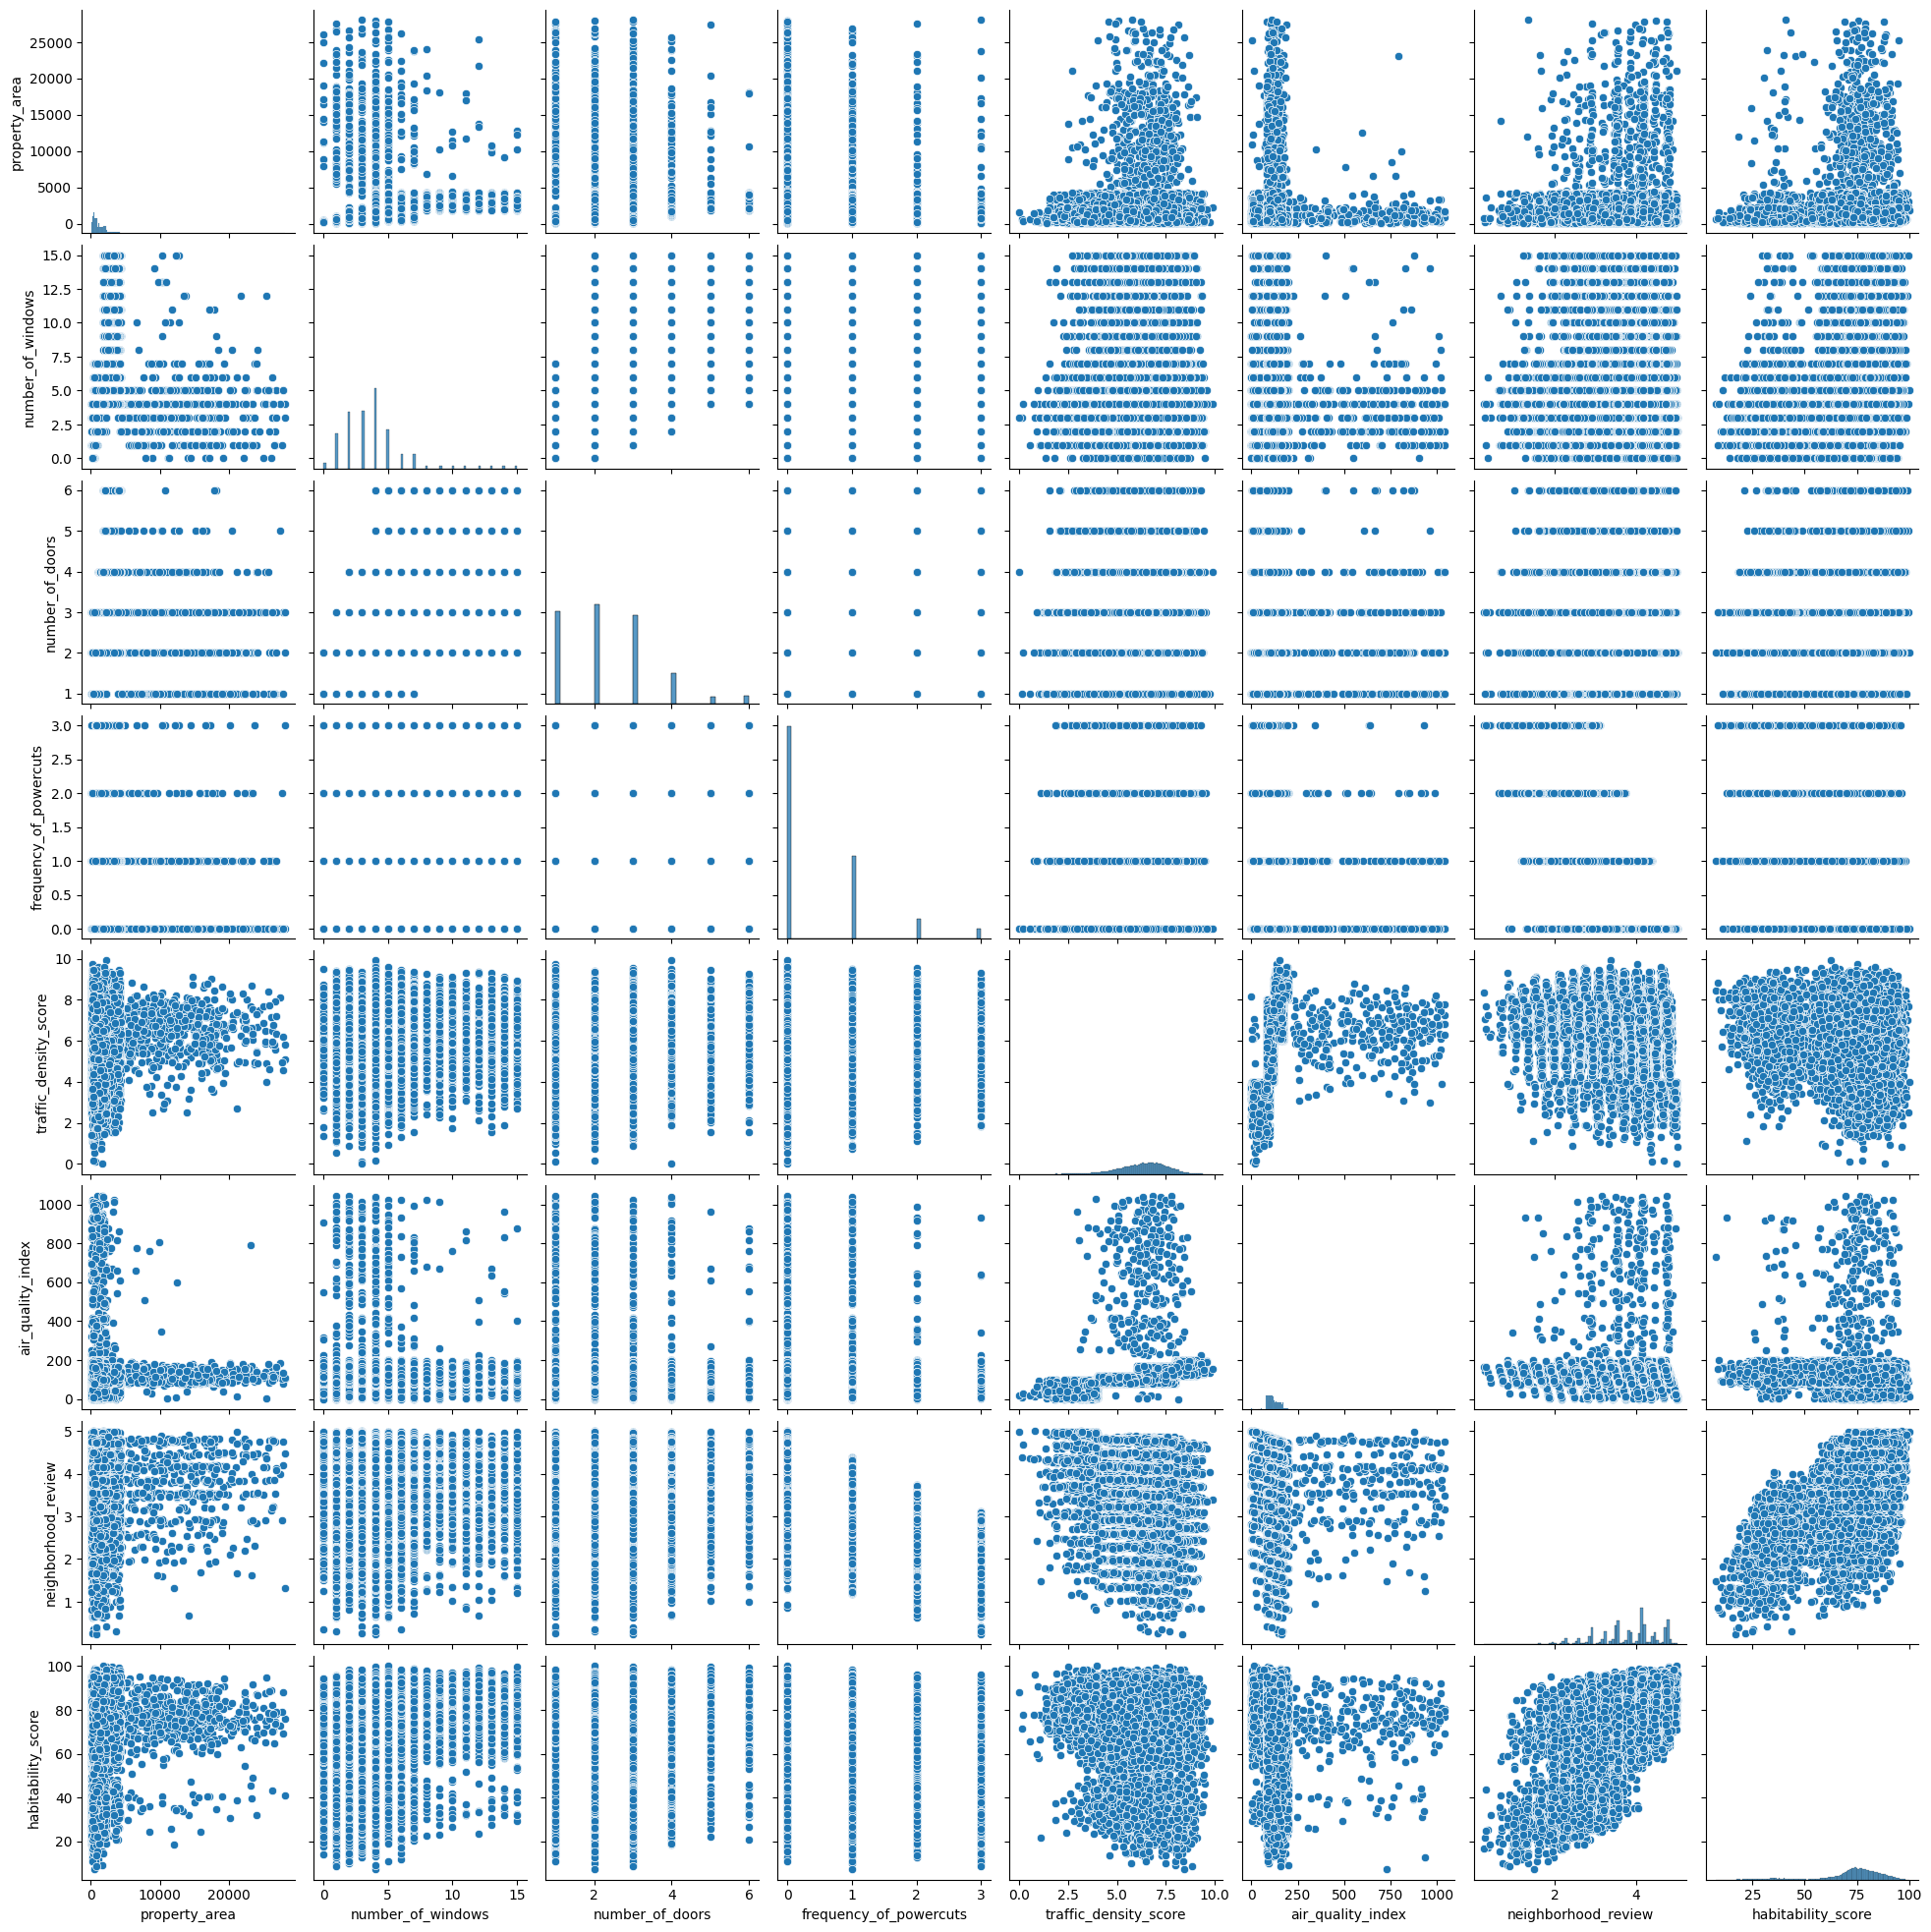

In [115]:
sns.pairplot(df)

In [92]:
from sklearn.model_selection import train_test_split


In [94]:
from sklearn import linear_model

In [ ]:
linear_model.LinearRegression

In [128]:
X = df_num.drop(['habitability_score'],axis = 1)
y = df_num['habitability_score']

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 7)

lr = linear_model.LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [97]:
lr_pred = lr.predict(X_test)

In [99]:
metrics.r2_score(y_test,lr_pred)

0.3131940705028312

In [100]:
metrics.mean_absolute_error(y_test,lr_pred)

0.6278475612920709

In [103]:
from sklearn.tree import DecisionTreeRegressor

In [189]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)

DecisionTreeRegressor()

In [190]:
dtr_pred = dtr.predict(X_test)

In [191]:
metrics.mean_absolute_error(y_test,dtr_pred)

0.8268493472479949

In [193]:
metrics.mean_squared_error(y_test,dtr_pred)

1.2851209361468496

In [132]:
metrics.r2_score(y_test,dtr_pred)

-0.29651682630455856

In [108]:
!pip install lightgbm

   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   -- ------------------------------------- 0.1/1.3 MB 1.1 MB/s eta 0:00:02
   ---------------------- ----------------- 0.8/1.3 MB 6.9 MB/s eta 0:00:01
   ---------------------------------------  1.3/1.3 MB 8.5 MB/s eta 0:00:01
   ---------------------------------------- 1.3/1.3 MB 7.7 MB/s eta 0:00:00


In [133]:
from lightgbm import LGBMRegressor

In [134]:

lgbm = LGBMRegressor(random_state=5)

lgbm.fit(X_train, y_train)

y_pred = lgbm.predict(X_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000325 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1026
[LightGBM] [Info] Number of data points in the train set: 23699, number of used features: 7
[LightGBM] [Info] Start training from score -0.000997


In [135]:
metrics.mean_absolute_error(y_test,y_pred)

0.5952081035558989

<Axes: xlabel='habitability_score'>

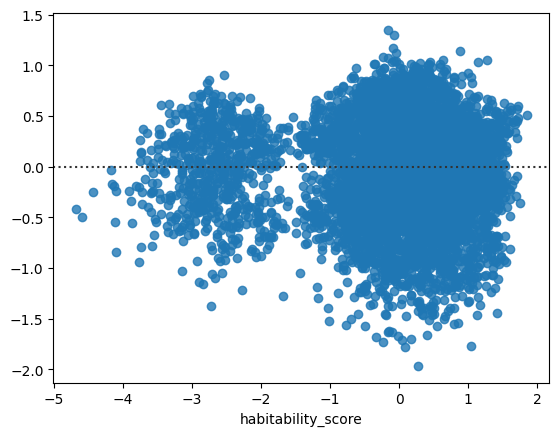

In [112]:
sns.residplot(x = y_test, y = lr_pred)

<Axes: xlabel='habitability_score'>

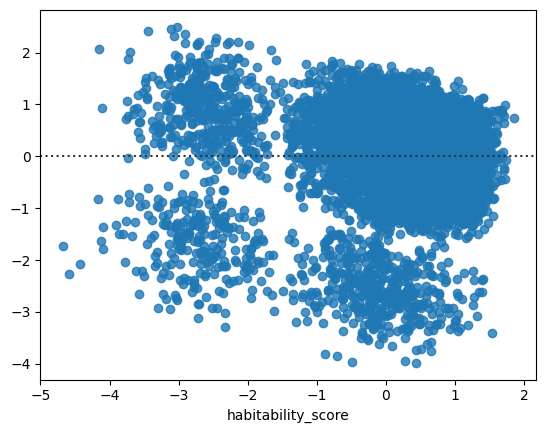

In [113]:
sns.residplot(x = y_test, y = dtr_pred)

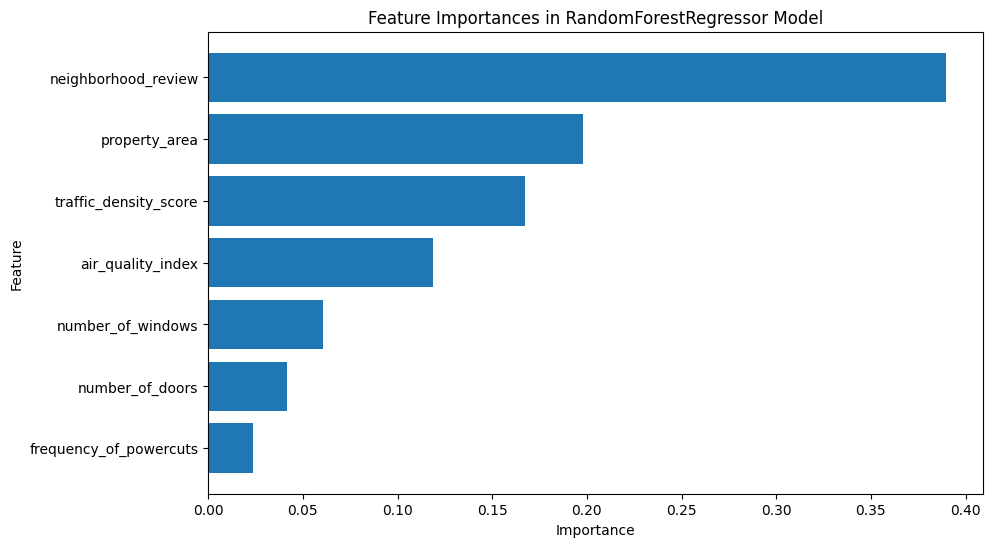

In [116]:
feature_importances = dtr.feature_importances_
features_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sorting the DataFrame by importance
features_df = features_df.sort_values(by='Importance', ascending=False)

# Visualizing feature importances
plt.figure(figsize=(10, 6))
plt.barh(features_df['Feature'], features_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in RandomForestRegressor Model')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()


In [119]:
df_new = df_num[["frequency_of_powercuts",
"number_of_doors",
"number_of_windows",
"air_quality_index",
"traffic_density_score",
"property_area",
"neighborhood_review"]]

In [120]:
df_new

frequency_of_powercuts  number_of_doors  number_of_windows  \
Id                                                                   
0x21e3               -0.628474        -1.131916           0.026786   
0x68d4                0.709834        -0.283241          -0.731641   
0x7d81               -0.628474        -0.283241           0.026786   
0x7a57                2.048141        -0.283241          -0.352428   
0x9409               -0.628474         3.111459           3.818920   
...                        ...              ...                ...   
0x4dbe               -0.628474        -1.131916           0.026786   
0x41b3               -0.628474        -1.131916          -1.110855   
0x8531               -0.628474         0.565434           0.785213   
0x2537                0.709834        -0.283241          -1.110855   
0x89aa               -0.628474         1.414109           0.026786   

        air_quality_index  traffic_density_score  property_area  \
Id                                                                
0x21e3          -0.505529              -0.382854      -0.659552   
0x68d4          -0.408865              -1.629394      -0.338123   
0x7d81          -0.006099               0.896489      -0.336072   
0x7a57          -0.344423              -0.161430      -0.252511   
0x9409          -0.086652              -0.735494       0.433410   
...                   ...                    ...            ...   
0x4dbe           0.444998               1.183521      -0.277631   
0x41b3          -0.634414              -0.358252      -0.552409   
0x8531          -0.666635              -0.555074      -0.467822   
0x2537           0.654437               0.601256      -0.384774   
0x89aa          -0.344423               0.092799       0.177087   

        neighborhood_review  
Id                           
0x21e3             0.158931  
0x68d4            -0.229401  
0x7d81             0.096297  
0x7a57            -2.997826  
0x9409             1.298870  
...                     ...  
0x4dbe             1.236236  
0x41b3             0.960647  
0x8531             0.183984  
0x2537             0.033663  
0x89aa             0.534735  

[31599 rows x 7 columns]

In [121]:
X = df_new
y = df_num['habitability_score']


X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:     habitability_score   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.317
Method:                 Least Squares   F-statistic:                     2093.
Date:                Thu, 28 Mar 2024   Prob (F-statistic):               0.00
Time:                        21:27:38   Log-Likelihood:                -38818.
No. Observations:               31599   AIC:                         7.765e+04
Df Residuals:                   31591   BIC:                         7.772e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -5.13

In [122]:
X = df_new
y = df_num['habitability_score']

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 7)

lr = linear_model.LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [124]:
lr_pred = lr.predict(X_test)

In [125]:
metrics.r2_score(y_test,lr_pred)

0.3131940705028312

In [127]:
metrics.mean_absolute_error(y_test,lr_pred)

0.6278475612920709

In [ ]:
metrics.mean_absolute_error(y_test,dtr_pred)

In [136]:
from sklearn.ensemble import RandomForestRegressor

In [137]:
X = df_num.drop(['habitability_score'],axis = 1)
y = df_num['habitability_score']

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 7)

rfg = RandomForestRegressor()
rfg.fit(X_train,y_train)
rfg_pred = rfg.predict(X_test)

In [138]:
metrics.mean_absolute_error(y_test,rfg_pred)

0.6134165117720463

In [139]:
metrics.r2_score(y_test,rfg_pred)

0.3185606903741026

In [140]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Example parameter grid for RandomForestRegressor
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestRegressor()

# Grid search with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best RMSE:", -grid_search.best_score_)


KeyboardInterrupt: 

In [ ]:
Best parameters: {'n_estimators': 500, 'min_samples_split': 15, 'min_samples_leaf': 6, 'max_depth': 40}
Best RMSE: 0.8154654475018047

In [206]:
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
rfr_pred = rfr.predict(X_test)

In [208]:
print(metrics.mean_absolute_error(y_test,rfr_pred))
print(metrics.mean_squared_error(y_test,rfr_pred))
#print(metric.mean_absolute_error(y_test,rfr_pred))
      

0.6133871821917952
0.673260995022586


In [209]:
from sklearn.metrics import r2_score

# Assuming y_true are the true target values and y_pred are the predictions from your model
# For demonstration, let's say we're working with a linear regression model
#y_true = [3, 5, 2, 7, 4.5]
#y_pred = [2.5, 5, 2, 8, 4.3]

# Calculate R-squared
r_squared = r2_score(y_test, rfr_pred)

# Assuming you have the number of observations (n) and number of predictors (p)
n = len(y_test)  # Number of observations
p = 2  # Example: let's assume there are 2 predictors in the model

# Calculate Adjusted R-squared
adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)

print("R-squared:", r_squared)
print("Adjusted R-squared:", adjusted_r_squared)


R-squared: 0.3193919970921102
Adjusted R-squared: 0.31921962581114083


In [210]:
import lightgbm as lgb

lgbm_reg = lgb.LGBMRegressor(learning_rate=0.1, n_estimators=100, max_depth=-1)
lgbm_reg.fit(X_train, y_train)

# Predict and calculate RMSE, etc., as needed


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001334 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1026
[LightGBM] [Info] Number of data points in the train set: 23699, number of used features: 7
[LightGBM] [Info] Start training from score -0.000997


LGBMRegressor()

In [211]:
lgbm_predict = lgbm_reg.predict(X_test)

In [212]:
metrics.mean_squared_error(y_test,lgbm_predict)

0.6416169467029802

In [149]:
from sklearn.ensemble import GradientBoostingRegressor

gbm = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbm.fit(X_train, y_train)
gbm_predict = gbm.predict(X_test)
metrics.mean_squared_error(y_test,gbm_predict)


0.6350312218920491

In [151]:
!pip install xgboost

  Using cached xgboost-2.0.3-py3-none-win_amd64.whl.metadata (2.0 kB)
Using cached xgboost-2.0.3-py3-none-win_amd64.whl (99.8 MB)


In [152]:
import xgboost as xgb

xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1, max_depth=5, alpha=10, n_estimators=100)
xg_reg.fit(X_train, y_train)
xg_predict = xg_reg.predict(X_test)
metrics.mean_squared_error(y_test,xg_predict)


0.6450945737922733

In [213]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

#svr_reg = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
svr_reg = SVR(C=1.0, epsilon=0.2)
svr_reg.fit(X, y)
svr_predict = svr_reg.predict(X_test)
metrics.mean_squared_error(y_test,svr_predict)
# Predict and calculate RMSE, etc., as needed


0.630505574321559

In [215]:
mse = metrics.mean_squared_error(y_test, svr_predict)

# Calculate the root mean squared error
rmse = np.sqrt(mse)
rmse

0.7940438113363513

In [154]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X, y)
ridge_predict = ridge_reg.predict(X_test)
metrics.mean_squared_error(y_test,ridge_predict)
# Predict and calculate RMSE, etc., as needed


0.6788948174707488

In [161]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasRegressor

def build_model():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(32, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# Wrap the Keras model with KerasRegressor
model = KerasRegressor(model=build_model, epochs=100, batch_size=10, verbose=0)

# Now you can use 'model' with scikit-learn functions like cross_val_score, GridSearchCV, etc.


In [ ]:
Sequential.compile(

model.fit(X_train, y_train)

# Evaluate the model on the test set
#mse = model.score(X_test, y_test)


In [3]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
...

Ellipsis

In [164]:
...
# define base model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(13, input_shape=(13,), kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model

In [167]:
...
kfold = KFold(n_splits=10)
results = cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))


KeyboardInterrupt



In [170]:
import tensorflow as tf

In [179]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasRegressor

def build_model():
    model = Sequential([
        Dense(128, activation='relu', input_dim=X_train.shape[1]),
        Dense(64, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model
model = KerasRegressor(model=build_model, epochs=100, batch_size=10, verbose=1)


In [180]:
model = KerasRegressor(model=build_model, epochs=100, batch_size=10, verbose=1)


In [181]:
model

KerasRegressor(
	model=<function build_model at 0x000001C26FB4D620>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=10
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=100
)

In [182]:
model.fit(X_train,y_train)

Epoch 1/100
2370/2370 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.6827
Epoch 2/100
2370/2370 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.6551
Epoch 3/100
2370/2370 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.6526
Epoch 4/100
2370/2370 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.6495
Epoch 5/100
2370/2370 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.6436
Epoch 6/100
2370/2370 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.6412
Epoch 7/100
2370/2370 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.6472
Epoch 8/100
2370/2370 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.6323
Epoch 9/100
2370/2370 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.6380
Epoch 10/100
2370/2370 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.6459
Epoch 11/100
2370/2370 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.6406
Epoch 12/100
2370/2370 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.6406
Epoch 13/100
2370/2370 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.6369
Epoch 14/100
2370/2370 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.6278
Epoch 15/100
23

ValueError: Could not interpret metric identifier: loss

In [183]:
model.predict(X_test)

790/790 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([0.37772122, 0.2823922 , 0.5626631 , ..., 0.29502577, 0.38451034,
       0.48778576], dtype=float32)

In [186]:
metrics.mean_squared_error(y_test,model.predict(X_test))

790/790 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


0.7056392065164641

In [188]:
metrics.mean_squared_error(y_test,dtr_pred)

1.2825212233942327

In [194]:
metrics.mean_absolute_error(y_test,model.predict(X_test))

790/790 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


0.6228601493763475

In [196]:
mse = metrics.mean_squared_error(y_test, model.predict(X_test))

# Calculate the root mean squared error
rmse = np.sqrt(mse)
rmse

790/790 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


0.8400233368880081

In [198]:
mse = metrics.mean_squared_error(y_test, model.predict(X_test))

# Calculate the root mean squared error
rmse = np.sqrt(mse)
rmse

1.1336317462680947

In [200]:
from sklearn.metrics import r2_score

# Assuming y_true are the true target values and y_pred are the predictions from your model
# For demonstration, let's say we're working with a linear regression model
#y_true = [3, 5, 2, 7, 4.5]
#y_pred = [2.5, 5, 2, 8, 4.3]

# Calculate R-squared
r_squared = r2_score(y_test, model.predict(X_test))

# Assuming you have the number of observations (n) and number of predictors (p)
n = len(y_test)  # Number of observations
p = 2  # Example: let's assume there are 2 predictors in the model

# Calculate Adjusted R-squared
adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)

print("R-squared:", r_squared)
print("Adjusted R-squared:", adjusted_r_squared)


790/790 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
R-squared: 0.2866604560916719
Adjusted R-squared: 0.28647979519667166


In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from lightgbm import LGBMRegressor

In [204]:
from sklearn.metrics import r2_score

# Assuming y_true are the true target values and y_pred are the predictions from your model
# For demonstration, let's say we're working with a linear regression model
#y_true = [3, 5, 2, 7, 4.5]
#y_pred = [2.5, 5, 2, 8, 4.3]

# Calculate R-squared
r_squared = r2_score(y_test, lr_pred)

# Assuming you have the number of observations (n) and number of predictors (p)
n = len(y_test)  # Number of observations
p = 2  # Example: let's assume there are 2 predictors in the model

# Calculate Adjusted R-squared
adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)

print("R-squared:", r_squared)
print("Adjusted R-squared:", adjusted_r_squared)


R-squared: 0.3131940705028312
Adjusted R-squared: 0.31302012953043734


In [201]:
from sklearn.metrics import r2_score

# Assuming y_true are the true target values and y_pred are the predictions from your model
# For demonstration, let's say we're working with a linear regression model
#y_true = [3, 5, 2, 7, 4.5]
#y_pred = [2.5, 5, 2, 8, 4.3]

# Calculate R-squared
r_squared = r2_score(y_test, dtr_pred)

# Assuming you have the number of observations (n) and number of predictors (p)
n = len(y_test)  # Number of observations
p = 2  # Example: let's assume there are 2 predictors in the model

# Calculate Adjusted R-squared
adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)

print("R-squared:", r_squared)
print("Adjusted R-squared:", adjusted_r_squared)


R-squared: -0.299144908605143
Adjusted R-squared: -0.29947393099557096


790/790 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


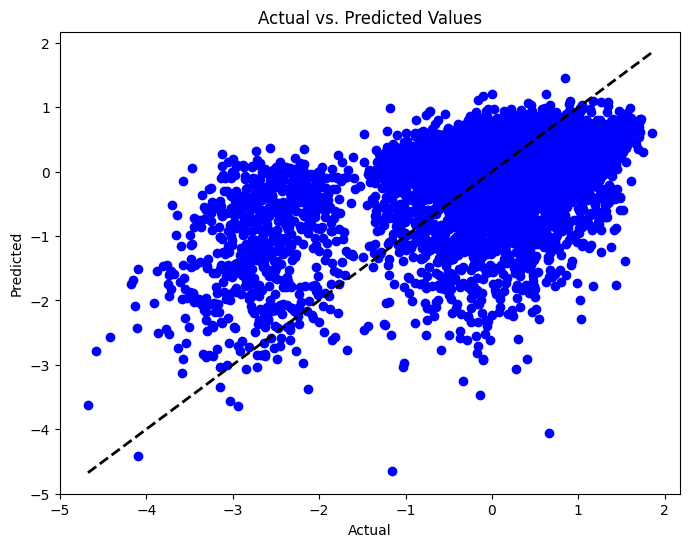

In [202]:
import matplotlib.pyplot as plt

# Assuming y_test are your actual values and y_pred are the predicted values from your model
y_test = y_test  # Example actual values
y_pred =  model.predict(X_test) # Example predicted values

# Scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)  # Diagonal line for reference
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.show()


In [216]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from scikeras.wrappers import KerasRegressor
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

def build_model():
    model = Sequential([
        Dense(128, activation='relu', input_dim=X_train.shape[1]),
        Dense(64, activation='relu', kernel_regularizer=l2(0.01)),  # Corrected regularization
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    return model

model = KerasRegressor(model=build_model, epochs=100, batch_size=10, verbose=1)

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# Note: You should split your data into training and validation sets or have a separate validation set
model.fit(X_train, y_train, validation_split=0.3, callbacks=[early_stopping, reduce_lr])


Epoch 1/100
1659/1659 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.0398 - val_loss: 0.6906
Epoch 2/100
1659/1659 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.6812 - val_loss: 0.6690
Epoch 3/100
1659/1659 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.6734 - val_loss: 0.6657
Epoch 4/100
1659/1659 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.6746 - val_loss: 0.6618
Epoch 5/100
1659/1659 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.6648 - val_loss: 0.6705
Epoch 6/100
1659/1659 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.6465 - val_loss: 0.6618
Epoch 7/100
1659/1659 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.6675 - val_loss: 0.6591
Epoch 8/100
1659/1659 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.6577 - val_loss: 0.6588
Epoch 9/100
1659/1659 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.6497 - val_loss: 0.6740
Epoch 10/100
1659/1659 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.6437 - val_loss: 0.6551
Epoch 11/100
1659/1659 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.6459 - val_loss: 0.6600
Epoch 12/100
1659/1

ValueError: Could not interpret metric identifier: loss

In [217]:
mp = model.predict(X_test)

790/790 ━━━━━━━━━━━━━━━━━━━━ 1s 934us/step


In [218]:
from sklearn.metrics import r2_score

# Assuming y_true are the true target values and y_pred are the predictions from your model
# For demonstration, let's say we're working with a linear regression model
#y_true = [3, 5, 2, 7, 4.5]
#y_pred = [2.5, 5, 2, 8, 4.3]

# Calculate R-squared
r_squared = r2_score(y_test, mp)

# Assuming you have the number of observations (n) and number of predictors (p)
n = len(y_test)  # Number of observations
p = 2  # Example: let's assume there are 2 predictors in the model

# Calculate Adjusted R-squared
adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)

print("R-squared:", r_squared)
print("Adjusted R-squared:", adjusted_r_squared)


R-squared: 0.3559445430423508
Adjusted R-squared: 0.35578142908592236


In [220]:
mse = metrics.mean_squared_error(y_test, mp)

# Calculate the root mean squared error
rmse = np.sqrt(mse)
rmse

0.7981873373176946

In [221]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Define your X and y here
# For example:
# X, y = some_dataset.drop('target', axis=1), some_dataset['target']

# Assuming X and y are already defined and preprocessed

# List of models to evaluate
models = [
    ("Linear Regression", LinearRegression()),
    ("Ridge Regression", Ridge()),
    ("Lasso Regression", Lasso()),
    ("ElasticNet", ElasticNet()),
    ("Decision Tree", DecisionTreeRegressor()),
    ("Random Forest", RandomForestRegressor())
]

# Prepare a list to store results
results = []

# Function to calculate adjusted R-squared
def adjusted_r2(r_square, labels, features):
    adj_r_squared = 1 - (1-r_square)*(len(labels)-1)/(len(labels)-features.shape[1]-1)
    return adj_r_squared

# Loop through models
for name, model in models:
    model.fit(X_train, y_train)  # Fit model
    y_pred = model.predict(X_test)  # Make predictions
    
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    adj_r2 = adjusted_r2(r2, y_test, X_test)
    
    # Append results
    results.append((name, rmse, r2, adj_r2))

# Create a DataFrame with the results
results_df = pd.DataFrame(results, columns=['Model', 'RMSE', 'R2 Score', 'Adjusted R2 Score'])

# Display the DataFrame
print(results_df)


               Model      RMSE  R2 Score  Adjusted R2 Score
0  Linear Regression  0.824252  0.313194           0.312585
1   Ridge Regression  0.824252  0.313195           0.312585
2   Lasso Regression  0.994596 -0.000016          -0.000903
3         ElasticNet  0.979856  0.029405           0.028545
4      Decision Tree  1.134221 -0.300496          -0.301650
5      Random Forest  0.820357  0.319671           0.319067


<Axes: >

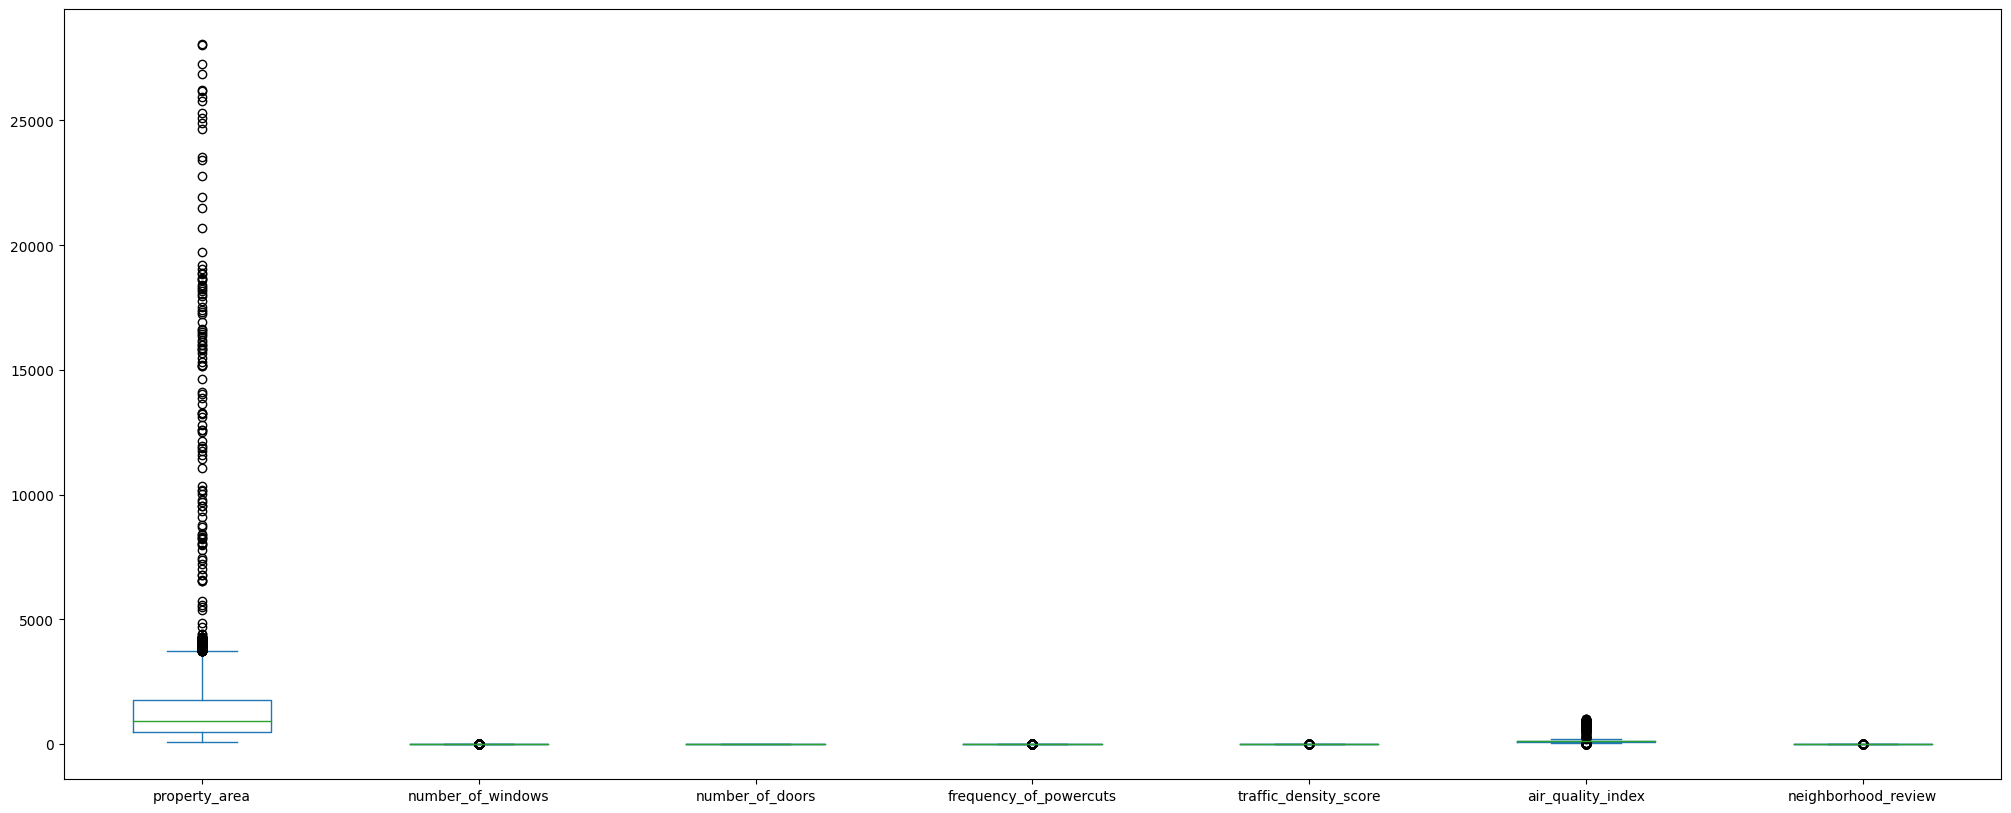

In [69]:
#plt.figure(figsize = (25,10))
test.plot(kind = 'box',figsize = (25,10))

In [ ]:
dataframe[(dataframe[col] < lower_bound) | (dataframe[col] > upper_bound)]

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31599 entries, 0x21e3 to 0x89aa
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   property_type           31599 non-null  object 
 1   property_area           31599 non-null  float64
 2   number_of_windows       31599 non-null  int64  
 3   number_of_doors         31599 non-null  int64  
 4   furnishing              31599 non-null  object 
 5   frequency_of_powercuts  31599 non-null  int64  
 6   power_backup            31599 non-null  object 
 7   water_supply            31599 non-null  object 
 8   traffic_density_score   31599 non-null  float64
 9   crime_rate              31599 non-null  object 
 10  dust_and_noise          31599 non-null  object 
 11  air_quality_index       31599 non-null  float64
 12  neighborhood_review     31599 non-null  float64
 13  habitability_score      31599 non-null  float64
dtypes: float64(5), int64(3), object(6)
me

In [70]:
q1 = np.quantile(test['property_area'],0.25)
q3 = np.quantile(test['property_area'],0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound =  q3 + (1.5 * iqr)

#iqr = q3 - q1
# Assuming 'lower_bound' and 'upper_bound' are already defined numeric values
outliers = test[(test['property_area'] < lower_bound) | (test['property_area'] > upper_bound)]


In [71]:

test['property_area'] = np.where(test['property_area'] < lower_bound, lower_bound, test['property_area'])

In [72]:
test['property_area'] = np.where(test['property_area'] > upper_bound, upper_bound, test['property_area'])

<Axes: >

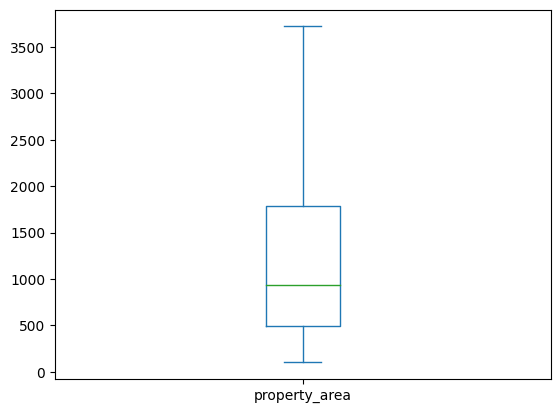

In [73]:
test['property_area'].plot(kind = 'box')

In [76]:
q1 = np.quantile(test['air_quality_index'],0.25)
q3 = np.quantile(test['air_quality_index'],0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound =  q3 + (1.5 * iqr)

#iqr = q3 - q1
# Assuming 'lower_bound' and 'upper_bound' are already defined numeric values
outliers = test[(test['air_quality_index'] < lower_bound) | (test['air_quality_index'] > upper_bound)]


In [77]:
test['air_quality_index'] = np.where(test['air_quality_index'] < lower_bound, lower_bound, test['air_quality_index'])
test['air_quality_index'] = np.where(test['air_quality_index'] > upper_bound, upper_bound, test['air_quality_index'])


<Axes: >

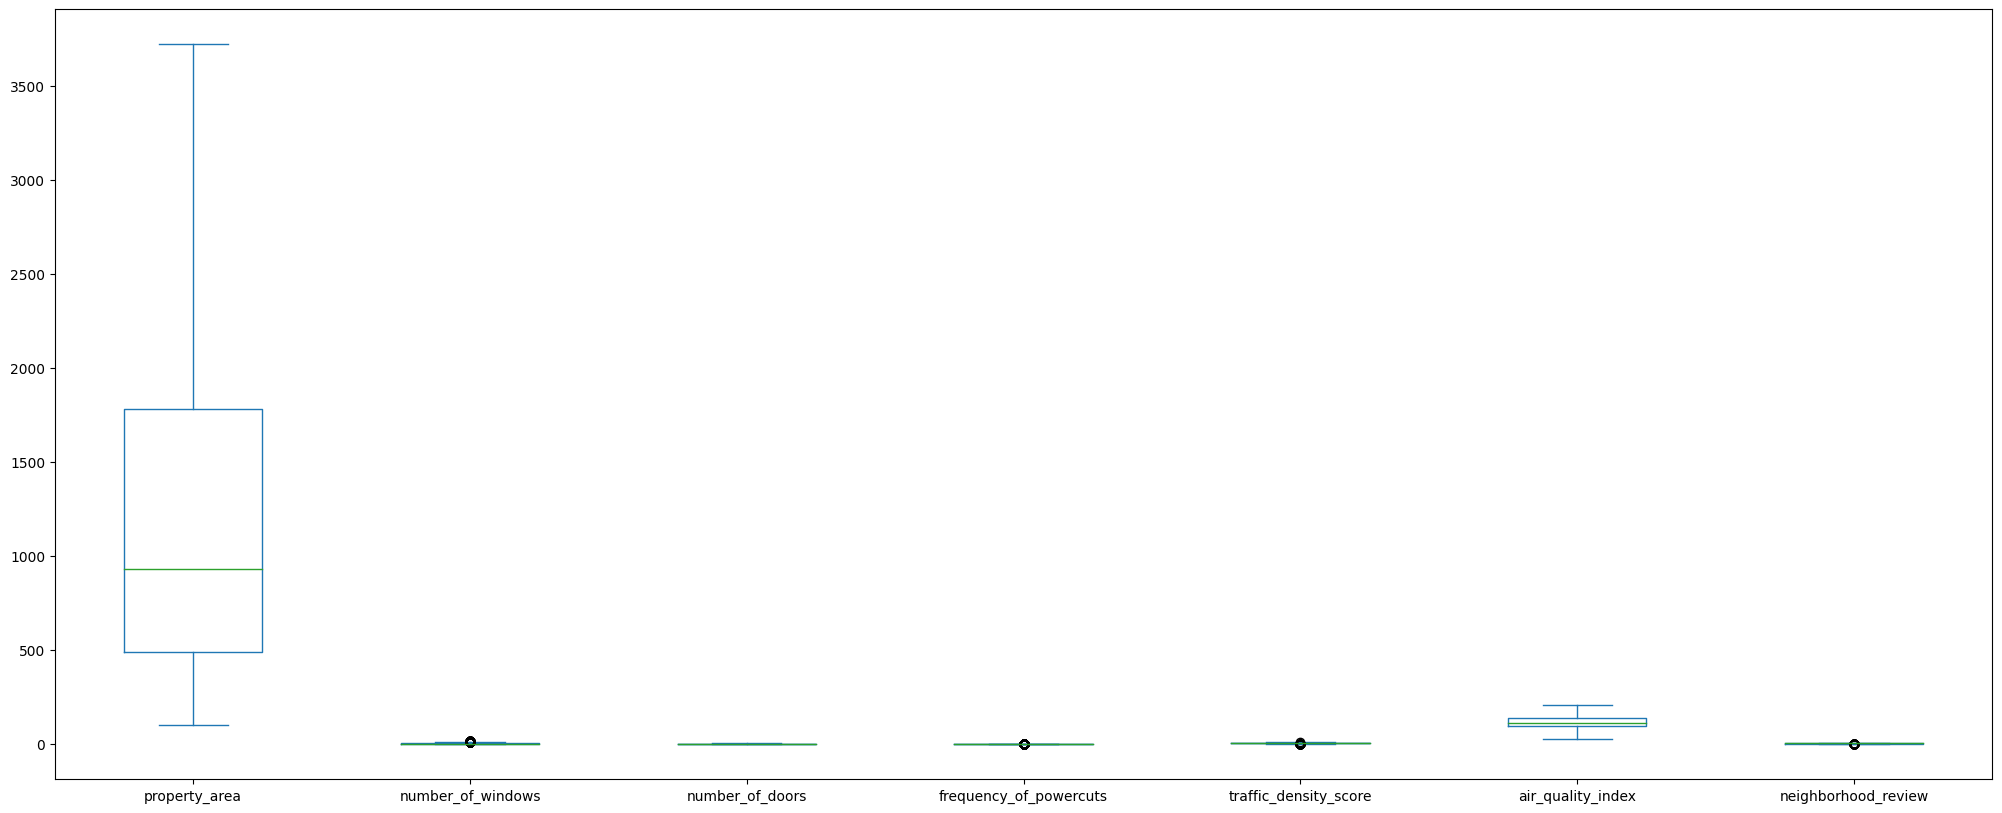

In [78]:
test.plot(kind = 'box',figsize = (25,10))


In [79]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7900 entries, 0x6808 to 0x8cb4
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   property_type           7900 non-null   object 
 1   property_area           7900 non-null   float64
 2   number_of_windows       7579 non-null   float64
 3   number_of_doors         7900 non-null   int64  
 4   furnishing              7686 non-null   object 
 5   frequency_of_powercuts  7626 non-null   float64
 6   power_backup            7900 non-null   object 
 7   water_supply            7900 non-null   object 
 8   traffic_density_score   7900 non-null   float64
 9   crime_rate              7742 non-null   object 
 10  dust_and_noise          7680 non-null   object 
 11  air_quality_index       7900 non-null   float64
 12  neighborhood_review     7900 non-null   float64
dtypes: float64(6), int64(1), object(6)
memory usage: 1.1+ MB


In [81]:
test['number_of_windows'].fillna(test['number_of_windows'].mode()[0],inplace  = True)
test['furnishing'].fillna(test['furnishing'].mode()[0],inplace  = True)
test['frequency_of_powercuts'].fillna(test['frequency_of_powercuts'].mode()[0],inplace  = True)
test['crime_rate'].fillna(test['crime_rate'].mode()[0],inplace  = True)
test['dust_and_noise'].fillna(test['dust_and_noise'].mode()[0],inplace  = True)

In [83]:
test['property_area'] = test['property_area'].astype('float64')
test['number_of_windows'] = test['number_of_windows'].astype('int64',)
test['frequency_of_powercuts'] = test['frequency_of_powercuts'].astype('int64')

In [91]:
ind = test.index

In [100]:
test['number_of_doors'] = test['number_of_doors'].astype('category')
test['number_of_windows'] = test['number_of_windows'].astype('category')

In [103]:
numeric = test.select_dtypes(include = np.number)
cat = test.select_dtypes(['object','category'])

In [104]:
cat

property_type number_of_windows number_of_doors       furnishing  \
Id                                                                              
0x6808  Single-family home                 5               1      Unfurnished   
0x6a98  Single-family home                 2               1   Semi_Furnished   
0xacc0           Apartment                 1               1      Unfurnished   
0x8225  Single-family home                 2               1   Semi_Furnished   
0xaee8  Single-family home                 2               2  Fully Furnished   
...                    ...               ...             ...              ...   
0x6e26  Single-family home                 3               2   Semi_Furnished   
0xa013           Apartment                 1               3  Fully Furnished   
0x9721            Bungalow                 6               6      Unfurnished   
0x7e25  Single-family home                 3               1   Semi_Furnished   
0x8cb4  Single-family home                 2               4  Fully Furnished   

       power_backup             water_supply              crime_rate  \
Id                                                                     
0x6808           No                 All time      Well below average   
0x6a98           No  Once in a day - Morning      Well below average   
0xacc0           No                 All time      Well below average   
0x8225           No  Once in a day - Evening      Well below average   
0xaee8           No  Once in a day - Evening  Slightly below average   
...             ...                      ...                     ...   
0x6e26           No                 All time  Slightly above average   
0xa013           No                 All time  Slightly above average   
0x9721          Yes         Once in two days      Well below average   
0x7e25           No  Once in a day - Morning  Slightly above average   
0x8cb4           No                 All time      Well below average   

       dust_and_noise  
Id                     
0x6808         Medium  
0x6a98         Medium  
0xacc0         Medium  
0x8225         Medium  
0xaee8         Medium  
...               ...  
0x6e26         Medium  
0xa013         Medium  
0x9721         Medium  
0x7e25         Medium  
0x8cb4           High  

[7900 rows x 8 columns]

In [88]:
from sklearn import preprocessing

In [105]:
ss = preprocessing.StandardScaler()
scaled = ss.fit_transform(numeric)
df_num = pd.DataFrame(scaled ,columns = numeric.columns)
df_num

property_area  frequency_of_powercuts  traffic_density_score  \
0          0.316764               -0.628334               1.034999   
1          1.082085               -0.628334              -0.873605   
2         -0.258302               -0.628334               1.125105   
3          0.428552               -0.628334              -0.128185   
4         -0.064822               -0.628334              -0.414885   
...             ...                     ...                    ...   
7895      -0.114267               -0.628334              -0.652436   
7896      -0.839818                0.737233              -0.529565   
7897       2.681522               -0.628334               0.404259   
7898       0.042667               -0.628334              -1.430622   
7899       0.002896               -0.628334               1.592016   

      air_quality_index  neighborhood_review  
0              1.223660             1.217346  
1             -1.118480             0.951822  
2             -0.833625             1.318498  
3              1.318612             0.433417  
4             -1.118480            -0.236715  
...                 ...                  ...  
7895          -1.181781            -0.236715  
7896          -0.991878            -1.033287  
7897           0.622300             0.066741  
7898          -0.928577            -0.628679  
7899           0.464047             1.166770  

[7900 rows x 5 columns]

In [106]:
cat.columns

Index(['property_type', 'number_of_windows', 'number_of_doors', 'furnishing',
       'power_backup', 'water_supply', 'crime_rate', 'dust_and_noise'],
      dtype='object')

In [107]:
df_num = df_num.set_index(ind)

In [108]:
le = preprocessing.LabelEncoder()

for col in cat.columns:
    cat[col] = le.fit_transform(cat[col])


In [109]:
df_new = cat.merge(df_num,left_index = True,right_index = True)

In [117]:
lgbm.predict(df_new).round(3)

array([ 0.246, -0.019,  0.251, ...,  0.288, -0.292,  0.576])

In [121]:
rmse

0.4387654459812288

In [ ]:
test.

In [120]:
pd.Series(lgbm.predict(df_new).round(4),index = df_new.index, name = 'Habitability_score').to_csv('Zafar0171_submission_first.csv')

In [98]:
test.shape

(7900, 13)

In [64]:
test.isnull().sum()

Id                          0
Property_Type               0
Property_Area               0
Number_of_Windows         321
Number_of_Doors             0
Furnishing                214
Frequency_of_Powercuts    274
Power_Backup                0
Water_Supply                0
Traffic_Density_Score       0
Crime_Rate                158
Dust_and_Noise            220
Air_Quality_Index           0
Neighborhood_Review         0
dtype: int64

In [26]:
df['number_of_doors'] = df['number_of_doors'].astype('category')
df['number_of_windows'] = df['number_of_windows'].astype('category')

In [27]:
numeric = df.select_dtypes(include = np.number)
cat = df.select_dtypes(['object','category'])

In [28]:
ind = df.index

In [30]:
from sklearn import preprocessing
ss = preprocessing.StandardScaler()
scaled = ss.fit_transform(numeric)
df_num = pd.DataFrame(scaled ,columns = numeric.columns)
df_num

property_area  frequency_of_powercuts  traffic_density_score  \
0          -1.210585               -0.628474              -0.382854   
1          -0.530369                0.709834              -1.629394   
2          -0.526030               -0.628474               0.896489   
3          -0.349195                2.048141              -0.161430   
4           1.102365               -0.628474              -0.735494   
...              ...                     ...                    ...   
31594      -0.402354               -0.628474               1.183521   
31595      -0.983846               -0.628474              -0.358252   
31596      -0.804842               -0.628474              -0.555074   
31597      -0.629093                0.709834               0.601256   
31598       0.559929               -0.628474               0.092799   

       air_quality_index  neighborhood_review  habitability_score  
0              -0.883007             0.158931           -0.103023  
1              -0.691769            -0.229401           -0.158161  
2               0.105056             0.096297           -0.144730  
3              -0.564277            -2.997826           -2.967333  
4              -0.054309             1.298870            1.432337  
...                  ...                  ...                 ...  
31594           0.997500             1.236236           -0.022438  
31595          -1.137991             0.960647            1.552508  
31596          -1.201737             0.183984            0.555089  
31597           1.411849             0.033663            0.661829  
31598          -0.564277             0.534735            0.742415  

[31599 rows x 6 columns]

In [31]:
df_num = df_num.set_index(ind)

In [32]:
le = preprocessing.LabelEncoder()

for col in cat.columns:
    cat[col] = le.fit_transform(cat[col])


In [33]:
df_new = cat.merge(df_num,left_index = True,right_index = True)

In [35]:
df_new

property_type  number_of_windows  number_of_doors  furnishing  \
Id                                                                      
0x21e3              1                  4                0           1   
0x68d4              1                  2                1           2   
0x7d81              1                  4                1           0   
0x7a57              1                  3                1           2   
0x9409              2                 14                5           0   
...               ...                ...              ...         ...   
0x4dbe              1                  4                0           1   
0x41b3              3                  1                0           0   
0x8531              4                  6                2           1   
0x2537              1                  1                1           1   
0x89aa              5                  4                3           1   

        power_backup  water_supply  crime_rate  dust_and_noise  property_area  \
Id                                                                              
0x21e3             1             3           1               2      -1.210585   
0x68d4             1             2           3               2      -0.530369   
0x7d81             1             3           1               2      -0.526030   
0x7a57             2             3           2               2      -0.349195   
0x9409             1             0           3               2       1.102365   
...              ...           ...         ...             ...            ...   
0x4dbe             1             0           3               2      -0.402354   
0x41b3             2             3           3               2      -0.983846   
0x8531             1             4           3               2      -0.804842   
0x2537             1             3           3               2      -0.629093   
0x89aa             1             2           3               2       0.559929   

        frequency_of_powercuts  traffic_density_score  air_quality_index  \
Id                                                                         
0x21e3               -0.628474              -0.382854          -0.883007   
0x68d4                0.709834              -1.629394          -0.691769   
0x7d81               -0.628474               0.896489           0.105056   
0x7a57                2.048141              -0.161430          -0.564277   
0x9409               -0.628474              -0.735494          -0.054309   
...                        ...                    ...                ...   
0x4dbe               -0.628474               1.183521           0.997500   
0x41b3               -0.628474              -0.358252          -1.137991   
0x8531               -0.628474              -0.555074          -1.201737   
0x2537                0.709834               0.601256           1.411849   
0x89aa               -0.628474               0.092799          -0.564277   

        neighborhood_review  habitability_score  
Id                                               
0x21e3             0.158931           -0.103023  
0x68d4            -0.229401           -0.158161  
0x7d81             0.096297           -0.144730  
0x7a57            -2.997826           -2.967333  
0x9409             1.298870            1.432337  
...                     ...                 ...  
0x4dbe             1.236236           -0.022438  
0x41b3             0.960647            1.552508  
0x8531             0.183984            0.555089  
0x2537             0.033663            0.661829  
0x89aa             0.534735            0.742415  

[31599 rows x 14 columns]

In [3]:
df_new = pd.read_csv('kaggle_data.csv')
df_new.head()

Id  property_type  number_of_windows  number_of_doors  furnishing  \
0  0x21e3              1                  4                0           1   
1  0x68d4              1                  2                1           2   
2  0x7d81              1                  4                1           0   
3  0x7a57              1                  3                1           2   
4  0x9409              2                 14                5           0   

   power_backup  water_supply  crime_rate  dust_and_noise  property_area  \
0             1             3           1               2      -1.210585   
1             1             2           3               2      -0.530369   
2             1             3           1               2      -0.526030   
3             2             3           2               2      -0.349195   
4             1             0           3               2       1.102365   

   frequency_of_powercuts  traffic_density_score  air_quality_index  \
0               -0.628474              -0.382854          -0.883007   
1                0.709834              -1.629394          -0.691769   
2               -0.628474               0.896489           0.105056   
3                2.048141              -0.161430          -0.564277   
4               -0.628474              -0.735494          -0.054309   

   neighborhood_review  habitability_score  
0             0.158931           -0.103023  
1            -0.229401           -0.158161  
2             0.096297           -0.144730  
3            -2.997826           -2.967333  
4             1.298870            1.432337

In [4]:
df_new.set_index('Id',inplace = True)

In [5]:
X = df_new.drop(['habitability_score'],axis = 1)
y = df_new['habitability_score']


X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:     habitability_score   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.569
Method:                 Least Squares   F-statistic:                     3210.
Date:                Sat, 30 Mar 2024   Prob (F-statistic):               0.00
Time:                        23:44:24   Log-Likelihood:                -31534.
No. Observations:               31599   AIC:                         6.310e+04
Df Residuals:                   31585   BIC:                         6.321e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [ ]:
['neighbor hood review','frequency of power cuts','power_backup','furnishing'

In [31]:
from tensorflow.keras.backend import clear_session
clear_session()


In [34]:
import tensorflow

In [36]:
tensorflow.compat.v1.reset_default_graph()

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from scikeras.wrappers import KerasRegressor
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

def build_model():
    model = Sequential([
        Dense(128, activation='relu', input_dim=X_train.shape[1]),
        Dense(64, activation='relu', kernel_regularizer=l2(0.01)),  # Corrected regularization
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    return model

model = KerasRegressor(model=build_model, epochs=50, batch_size=10, verbose=1)

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# Note: You should split your data into training and validation sets or have a separate validation set
model.fit(X_train, y_train, validation_split=0.3, callbacks=[early_stopping, reduce_lr])


Epoch 1/50
1659/1659 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.8489 - val_loss: 0.3634
Epoch 2/50
1659/1659 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.3367 - val_loss: 0.3214
Epoch 3/50
1659/1659 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.2909 - val_loss: 0.2797
Epoch 4/50
1659/1659 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.2684 - val_loss: 0.2628
Epoch 5/50
1659/1659 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.2548 - val_loss: 0.2548
Epoch 6/50
1659/1659 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.2428 - val_loss: 0.2396
Epoch 7/50
1659/1659 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2309 - val_loss: 0.2550
Epoch 8/50
1659/1659 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2231 - val_loss: 0.2229
Epoch 9/50
1659/1659 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.2166 - val_loss: 0.2264
Epoch 10/50
1659/1659 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.2142 - val_loss: 0.2482
Epoch 11/50
1659/1659 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2146 - val_loss: 0.2222
Epoch 12/50
1659/1659 ━━━━━━━━

ValueError: Could not interpret metric identifier: loss

In [38]:
mp = model.predict(X_test)

790/790 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [62]:
model

KerasRegressor(
	model=<function build_model at 0x000002B86785BB00>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=10
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=50
)

In [39]:
from sklearn.metrics import r2_score

# Assuming y_true are the true target values and y_pred are the predictions from your model
# For demonstration, let's say we're working with a linear regression model
#y_true = [3, 5, 2, 7, 4.5]
#y_pred = [2.5, 5, 2, 8, 4.3]

# Calculate R-squared
r_squared = r2_score(y_test, mp)

# Assuming you have the number of observations (n) and number of predictors (p)
n = len(y_test)  # Number of observations
p = 2  # Example: let's assume there are 2 predictors in the model

# Calculate Adjusted R-squared
adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)

print("R-squared:", r_squared)
print("Adjusted R-squared:", adjusted_r_squared)


R-squared: 0.8030519340723804
Adjusted R-squared: 0.8030020548610527


In [40]:
mse = metrics.mean_squared_error(y_test, mp)

# Calculate the root mean squared error
rmse = np.sqrt(mse)
rmse

0.4413865160546343

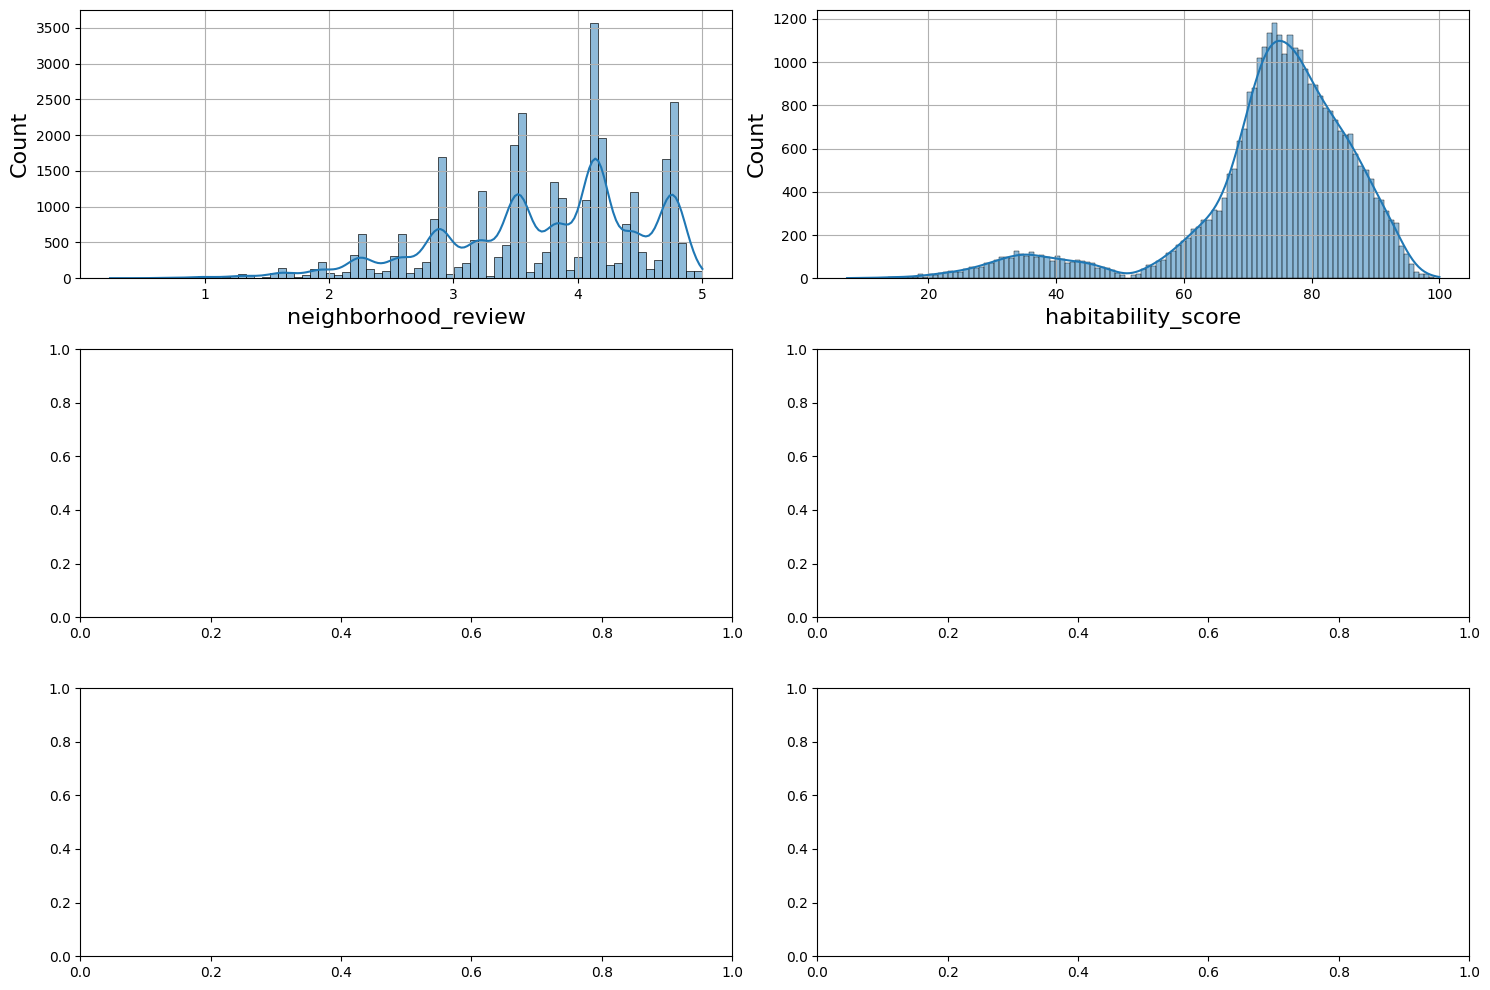

In [284]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))
axs = axs.flatten()

for row, var in enumerate(numeric.columns[4:8]):
    sns.histplot(data=df, x=var, kde=True, ax=axs[row])
   # plt.tick_params(axis='both', which='major', labelsize=10)
    axs[row].set_xlabel(f'{var}', fontsize=16)  
    axs[row].set_ylabel('Count', fontsize=16)   
    axs[row].grid(True)
    
        
   
plt.tight_layout()

In [66]:
df_new.to_csv('kaggle_data.csv')

In [54]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming X and y are your features and target variable
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid to search
param_distributions = {
    'n_estimators': [100, 200],  # Number of trees in the forest
    'max_features': ['auto', 'sqrt', 'log2'],          # Number of features to consider at every split
      # Maximum number of levels in tree
    'min_samples_split': [2,3 ],                   # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, ],                     # Minimum number of samples required at each leaf node
    'bootstrap': [True, False]                         # Method of selecting samples for training each tree
}

# Initialize the regressor
rf = RandomForestRegressor()

# Setup the random search with 4-fold cross validation
random_search = RandomizedSearchCV(estimator=rf, 
                                   param_distributions=param_distributions,
                                   n_iter=10,  # Number of parameter settings that are sampled
                                   cv=3,        # 4-fold cross-validation
                                   verbose=2, 
                                   random_state=42, 
                                   n_jobs=-1)

# Fit the random search model
random_search.fit(X_train, y_train)

# print("Best parameters found: ", random_search.best_params_)
best_rf = random_search.best_estimator_

# Predict on the test set
predictions = best_rf.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print("RMSE: ", rmse)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
RMSE:  0.4387654459812288


In [55]:
test=pd.read_csv('test.csv')

In [56]:
best_rf

RandomForestRegressor(bootstrap=False, max_features='log2', min_samples_split=3,
                      n_estimators=200)

In [58]:
X = df.drop(['habitability_score'],axis = 1)
y = df['habitability_score']

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 7)

rfg = RandomForestRegressor()
rfg.fit(X_train,y_train)
rfg_pred = rfg.predict(X_test)

In [44]:
mse = metrics.mean_squared_error(y_test, rfg_pred)

# Calculate the root mean squared error
rmse = np.sqrt(mse)
rmse

0.43461510494127226

In [57]:
from sklearn.metrics import r2_score

# Assuming y_true are the true target values and y_pred are the predictions from your model
# For demonstration, let's say we're working with a linear regression model
#y_true = [3, 5, 2, 7, 4.5]
#y_pred = [2.5, 5, 2, 8, 4.3]

# Calculate R-squared
r_squared = r2_score(y_test, rfg_pred)

# Assuming you have the number of observations (n) and number of predictors (p)
n = len(y_test)  # Number of observations
p = 2  # Example: let's assume there are 2 predictors in the model

# Calculate Adjusted R-squared
adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)

print("R-squared:", r_squared)
print("Adjusted R-squared:", adjusted_r_squared)


R-squared: 0.8090484320092572
Adjusted R-squared: 0.809000071475386


model.fit(X_train, y_train, validation_split=0.3, callbacks=[early_stopping, reduce_lr])
#model.predict(X_test)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
X = df_new.drop(['habitability_score'],axis = 1)
y = df_new['habitability_score']

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 7)

lr = LinearRegression()
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)

In [11]:
from sklearn.metrics import r2_score

# Assuming y_true are the true target values and y_pred are the predictions from your model
# For demonstration, let's say we're working with a linear regression model
#y_true = [3, 5, 2, 7, 4.5]
#y_pred = [2.5, 5, 2, 8, 4.3]

# Calculate R-squared
r_squared = r2_score(y_test, lr_pred)

# Assuming you have the number of observations (n) and number of predictors (p)
n = len(y_test)  # Number of observations
p = 2  # Example: let's assume there are 2 predictors in the model

# Calculate Adjusted R-squared
adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)

print("R-squared:", r_squared)
print("Adjusted R-squared:", adjusted_r_squared)


R-squared: 0.558934196062442
Adjusted R-squared: 0.5588224914141103


In [ ]:
KerasRegressor(model=build_model, epochs=50, batch_size=10, verbose=1)

In [12]:
mse = metrics.mean_squared_error(y_test, lr_pred)

# Calculate the root mean squared error
rmse = np.sqrt(mse)
rmse

0.6605335717124953

In [ ]:
'boosting_type': ['rf'],  # Using RandomForest mode
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7, 10],
    'num_leaves': [31, 50, 70],
    'bagging_fraction': [0.8, 0.9],  # Subsample ratio of the training instance.
    'bagging_freq': [1],  # Performing bagging at every K iteration
    'feature_fraction': [0.8, 0.9],  # Subsample ratio of features
    'subsample': [0.6, 0.8, 1.0]  # This is for 'gbdt' so may not be necessary here
}

In [ ]:
lgbm_param_grid = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7, 10],
    'num_leaves': [31, 50, 70],  # should be less than 2^max_depth
    'boosting_type': ['gbdt', 'dart', 'goss'],
    'subsample': [0.6, 0.8, 1.0]  # only works with 'gbdt'
}

In [ ]:
['neighbor hood review','frequency of power cuts','power_backup','furnishing'

In [122]:
df_new.columns

Index(['property_type', 'number_of_windows', 'number_of_doors', 'furnishing',
       'power_backup', 'water_supply', 'crime_rate', 'dust_and_noise',
       'property_area', 'frequency_of_powercuts', 'traffic_density_score',
       'air_quality_index', 'neighborhood_review'],
      dtype='object')

In [126]:
df = pd.read_csv('kaggle_data.csv',index_col = 0)

In [146]:
const                     -0.1654      0.022     -7.684      0.000      -0.208      -0.123
property_type              0.0212      0.002      9.289      0.000       0.017       0.026
number_of_windows          0.0153      0.002      8.951      0.000       0.012       0.019
number_of_doors            0.0190      0.004      5.261      0.000       0.012       0.026
furnishing                -0.6291      0.005   -114.631      0.000      -0.640      -0.618
power_backup               0.5441      0.008     66.744      0.000       0.528       0.560
water_supply               0.0314      0.003     10.577      0.000       0.026       0.037
crime_rate                -0.0690      0.005    -15.117      0.000      -0.078      -0.060
dust_and_noise             0.0714      0.007     10.787      0.000       0.058       0.084
property_area              0.0760      0.005     15.376      0.000       0.066       0.086
frequency_of_powercuts     0.1662      0.005     30.669      0.000       0.156       0.177
traffic_density_score     -0.0315      0.005     -6.741      0.000      -0.041      -0.022
air_quality_index         -0.0046      0.005     -0.999      0.318      -0.014       0.004
neighborhood_review        0.6907      0.007    100.544      0.000       0.677       0.704

SyntaxError: invalid syntax (3599844912.py, line 1)

In [170]:
d = df[['power_backup','neighborhood_review','furnishing','frequency_of_powercuts','crime_rate','dust_and_noise','property_area',
       'traffic_density_score','water_supply','property_type']]

In [171]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
X = d
y = df['habitability_score']

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 7)

RF = RandomForestRegressor()
RF.fit(X_train,y_train)
lr_pred = RF.predict(X_test)

In [172]:
from sklearn.metrics import r2_score

# Assuming y_true are the true target values and y_pred are the predictions from your model
# For demonstration, let's say we're working with a linear regression model
#y_true = [3, 5, 2, 7, 4.5]
#y_pred = [2.5, 5, 2, 8, 4.3]

# Calculate R-squared
r_squared = r2_score(y_test, lr_pred)

# Assuming you have the number of observations (n) and number of predictors (p)
n = len(y_test)  # Number of observations
p = 13  # Example: let's assume there are 2 predictors in the model

# Calculate Adjusted R-squared
adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)

print("R-squared:", r_squared)
print("Adjusted R-squared:", adjusted_r_squared)


R-squared: 0.8031539940843764
Adjusted R-squared: 0.8028294952158875


In [173]:
mse = metrics.mean_squared_error(y_test, lr_pred)

# Calculate the root mean squared error
rmse = np.sqrt(mse)
rmse

0.4412721362802807

In [174]:
%%time

from lightgbm import LGBMRegressor

lgbm_new = LGBMRegressor(boosting_type = 'dart',num_leaves = 70,max_depth = 10,learning_rate = 0.2,n_estimators = 100,random_state=5,)

lgbm_new.fit(X_train, y_train)

y_pr = lgbm_new.predict(X_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001730 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 771
[LightGBM] [Info] Number of data points in the train set: 23699, number of used features: 10
[LightGBM] [Info] Start training from score -0.000997
CPU times: total: 5.53 s
Wall time: 1.39 s


In [175]:
from sklearn.metrics import r2_score

# Assuming y_true are the true target values and y_pred are the predictions from your model
# For demonstration, let's say we're working with a linear regression model
#y_true = [3, 5, 2, 7, 4.5]
#y_pred = [2.5, 5, 2, 8, 4.3]

# Calculate R-squared
r_squared = r2_score(y_test, y_pr)

# Assuming you have the number of observations (n) and number of predictors (p)
n = len(y_test)  # Number of observations
p = 13  # Example: let's assume there are 2 predictors in the model

# Calculate Adjusted R-squared
adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)

print("R-squared:", r_squared)
print("Adjusted R-squared:", adjusted_r_squared)


R-squared: 0.8116854581841514
Adjusted R-squared: 0.8113750233574197


In [67]:
test=pd.read_csv('test.csv',index_col = 0)
test.columns = [x.lower().strip() for x in test.columns]

In [176]:
mse = metrics.mean_squared_error(y_test, y_pr)

# Calculate the root mean squared error
rmse = np.sqrt(mse)
rmse

0.43160367162857427

In [166]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler


In [177]:
# Assuming df is your DataFrame and the target variable is named 'target'
#X = df.drop('target', axis=1)
#y = df['target']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [178]:
pca = PCA(n_components='mle')  # 'mle' automatically selects the number of components or choose a specific number
X_pca = pca.fit_transform(X_scaled)


In [179]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)


In [182]:
%%time

from lightgbm import LGBMRegressor

#model = LGBMRegressor(boosting_type = 'dart',num_leaves = 70,max_depth = 10,learning_rate = 0.2,n_estimators = 100,random_state=5,)
model = LGBMRegressor()
model.fit(X_train, y_train)

pca_model = model.predict(X_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001517 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 25279, number of used features: 9
[LightGBM] [Info] Start training from score -0.003967
CPU times: total: 1.53 s
Wall time: 398 ms


In [183]:
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')


RMSE: 0.4656460665190172


In [ ]:
const                     -0.1654      0.022     -7.684      0.000      -0.208      -0.123
property_type              0.0212      0.002      9.289      0.000       0.017       0.026
number_of_windows          0.0153      0.002      8.951      0.000       0.012       0.019
number_of_doors            0.0190      0.004      5.261      0.000       0.012       0.026
furnishing                -0.6291      0.005   -114.631      0.000      -0.640      -0.618
power_backup               0.5441      0.008     66.744      0.000       0.528       0.560
water_supply               0.0314      0.003     10.577      0.000       0.026       0.037
crime_rate                -0.0690      0.005    -15.117      0.000      -0.078      -0.060
dust_and_noise             0.0714      0.007     10.787      0.000       0.058       0.084
property_area              0.0760      0.005     15.376      0.000       0.066       0.086
frequency_of_powercuts     0.1662      0.005     30.669      0.000       0.156       0.177
traffic_density_score     -0.0315      0.005     -6.741      0.000      -0.041      -0.022
air_quality_index         -0.0046      0.005     -0.999      0.318      -0.014       0.004
neighborhood_review        0.6907      0.007    100.544      0.000       0.677       0.704

In [51]:
learning_rate': 0.271, 'max_depth: 9.577, 'min_child_weight': 1.786, 'n_estimators': 952.731, 'num_leaves': 96.135

0.4366746948108452

In [29]:
%%time

from lightgbm import LGBMRegressor

lgbm = LGBMRegressor(boosting_type = 'dart',num_leaves = 96,max_depth = 10,learning_rate = 0.271,n_estimators = 800,min_child_weight = 0.005)

lgbm.fit(X_train, y_train)

y_pre = lgbm.predict(X_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002365 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 969
[LightGBM] [Info] Number of data points in the train set: 23699, number of used features: 13
[LightGBM] [Info] Start training from score -0.000997
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
CPU times: total: 2min 19s
Wall time: 35.4 s


In [27]:
from sklearn.metrics import r2_score

# Assuming y_true are the true target values and y_pred are the predictions from your model
# For demonstration, let's say we're working with a linear regression model
#y_true = [3, 5, 2, 7, 4.5]
#y_pred = [2.5, 5, 2, 8, 4.3]

# Calculate R-squared
r_squared = r2_score(y_test, y_pre)

# Assuming you have the number of observations (n) and number of predictors (p)
n = len(y_test)  # Number of observations
p = 13  # Example: let's assume there are 2 predictors in the model

# Calculate Adjusted R-squared
adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)

print("R-squared:", r_squared)
print("Adjusted R-squared:", adjusted_r_squared)


R-squared: 0.801108719407137
Adjusted R-squared: 0.8007808489217569


In [28]:
mse = metrics.mean_squared_error(y_test, y_pre)

# Calculate the root mean squared error
rmse = np.sqrt(mse)
rmse

0.4435586710478873

In [46]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
rfr_pred = rfr.predict(X_test)

In [47]:
mse = metrics.mean_squared_error(y_test, rfr_pred)

# Calculate the root mean squared error
rmse = np.sqrt(mse)
rmse

0.4398490797998915

In [48]:
from sklearn.metrics import r2_score

# Assuming y_true are the true target values and y_pred are the predictions from your model
# For demonstration, let's say we're working with a linear regression model
#y_true = [3, 5, 2, 7, 4.5]
#y_pred = [2.5, 5, 2, 8, 4.3]

# Calculate R-squared
r_squared = r2_score(y_test, rfr_pred)

# Assuming you have the number of observations (n) and number of predictors (p)
n = len(y_test)  # Number of observations
p = 13  # Example: let's assume there are 2 predictors in the model

# Calculate Adjusted R-squared
adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)

print("R-squared:", r_squared)
print("Adjusted R-squared:", adjusted_r_squared)


R-squared: 0.804421562451839
Adjusted R-squared: 0.8040991531583916


In [43]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)
dtr_pred = dtr.predict(X_test)

In [44]:
mse = metrics.mean_squared_error(y_test, dtr_pred)

# Calculate the root mean squared error
rmse = np.sqrt(mse)
rmse

0.5932339819621995

In [45]:
from sklearn.metrics import r2_score

# Assuming y_true are the true target values and y_pred are the predictions from your model
# For demonstration, let's say we're working with a linear regression model
#y_true = [3, 5, 2, 7, 4.5]
#y_pred = [2.5, 5, 2, 8, 4.3]

# Calculate R-squared
r_squared = r2_score(y_test, dtr_pred)

# Assuming you have the number of observations (n) and number of predictors (p)
n = len(y_test)  # Number of observations
p = 13  # Example: let's assume there are 2 predictors in the model

# Calculate Adjusted R-squared
adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)

print("R-squared:", r_squared)
print("Adjusted R-squared:", adjusted_r_squared)


R-squared: 0.6442330193754735
Adjusted R-squared: 0.6436465407109897


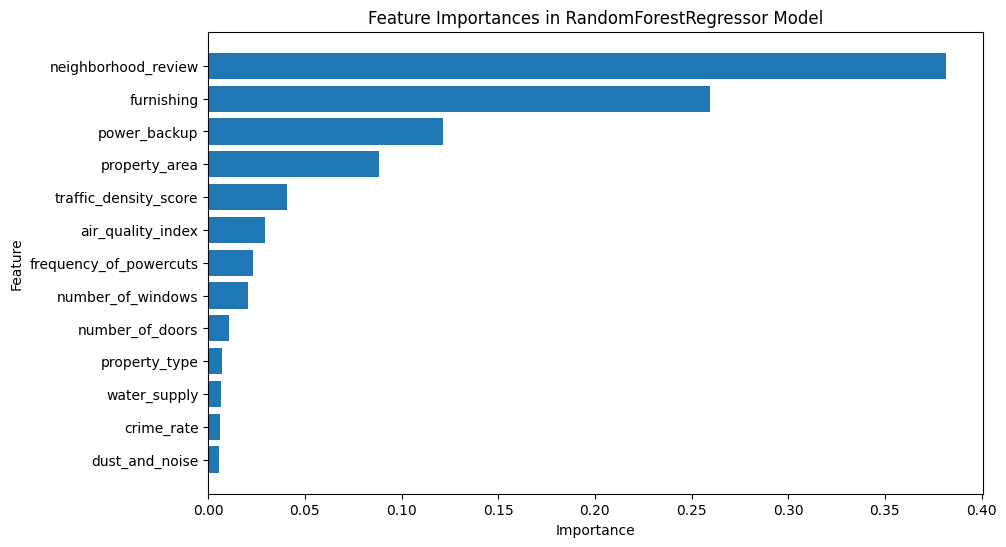

In [26]:
feature_importances = rfr.feature_importances_
features_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sorting the DataFrame by importance
features_df = features_df.sort_values(by='Importance', ascending=False)

# Visualizing feature importances
plt.figure(figsize=(10, 6))
plt.barh(features_df['Feature'], features_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in RandomForestRegressor Model')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()


In [33]:
0.381+0.259+0.121+0.088+0.040+0.029+0.022+0.020


0.9600000000000001

In [58]:
features_df.sort_values(by='Importance', ascending=False).head(10)['Feature'].values

array(['neighborhood_review', 'furnishing', 'power_backup',
       'property_area', 'traffic_density_score', 'air_quality_index',
       'frequency_of_powercuts', 'number_of_windows', 'number_of_doors',
       'property_type'], dtype=object)

In [66]:
df = df_new[['neighborhood_review', 'furnishing', 'power_backup',
       ]]

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
X = df
y = df_new['habitability_score']

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 7)

lr = LinearRegression()
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)

In [68]:
mse = metrics.mean_squared_error(y_test, lr_pred)

# Calculate the root mean squared error
rmse = np.sqrt(mse)
rmse

0.6863345321602677

In [62]:
from sklearn.metrics import r2_score

# Assuming y_true are the true target values and y_pred are the predictions from your model
# For demonstration, let's say we're working with a linear regression model
#y_true = [3, 5, 2, 7, 4.5]
#y_pred = [2.5, 5, 2, 8, 4.3]

# Calculate R-squared
r_squared = r2_score(y_test, lr_pred)

# Assuming you have the number of observations (n) and number of predictors (p)
n = len(y_test)  # Number of observations
p = 13  # Example: let's assume there are 2 predictors in the model

# Calculate Adjusted R-squared
adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)

print("R-squared:", r_squared)
print("Adjusted R-squared:", adjusted_r_squared)


R-squared: 0.5544829189958589
Adjusted R-squared: 0.5537484880989462


In [49]:
from sklearn.tree import DecisionTreeRegressor
X = df_new.drop(['habitability_score'],axis = 1)
y = df_new['habitability_score']

In [50]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 7)

In [52]:
dtr = DecisionTreeRegressor()

In [53]:
from sklearn.tree import DecisionTreeRegressor
X = df_new.drop(['habitability_score'],axis = 1)
y = df_new['habitability_score']

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 7)

#dtr = DecisionTreeRegressor
dtr.fit(X_train,y_train)
dtr_pred = dtr.predict(X_test)

In [54]:
mse = metrics.mean_squared_error(y_test, dtr_pred)

# Calculate the root mean squared error
rmse = np.sqrt(mse)
rmse

0.5899559023735577

In [184]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Define your X and y here
# For example:
# X, y = some_dataset.drop('target', axis=1), some_dataset['target']

# Assuming X and y are already defined and preprocessed

# List of models to evaluate
models = [
    ("Linear Regression", LinearRegression()),
    ("Ridge Regression", Ridge()),
    ("Lasso Regression", Lasso()),
    ("ElasticNet", ElasticNet()),
    ("Decision Tree", DecisionTreeRegressor()),
    ("Random Forest", RandomForestRegressor())
]

# Prepare a list to store results
results = []

# Function to calculate adjusted R-squared
def adjusted_r2(r_square, labels, features):
    adj_r_squared = 1 - (1-r_square)*(len(labels)-1)/(len(labels)-features.shape[1]-1)
    return adj_r_squared

# Loop through models
for name, model in models:
    model.fit(X_train, y_train)  # Fit model
    y_pred = model.predict(X_test)  # Make predictions
    
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    adj_r2 = adjusted_r2(r2, y_test, X_test)
    
    # Append results
    results.append((name, rmse, r2, adj_r2))

# Create a DataFrame with the results
results_df = pd.DataFrame(results, columns=['Model', 'RMSE', 'R2 Score', 'Adjusted R2 Score'])

# Display the DataFrame
print(results_df)


               Model      RMSE  R2 Score  Adjusted R2 Score
0  Linear Regression  0.684182  0.507347           0.506645
1   Ridge Regression  0.684181  0.507348           0.506646
2   Lasso Regression  0.974970 -0.000414          -0.001841
3         ElasticNet  0.935033  0.079867           0.078554
4      Decision Tree  0.628959  0.583666           0.583073
5      Random Forest  0.462838  0.774548           0.774226


In [146]:
lgbm_param_grid = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7, 10],
    'num_leaves': [31, 50, 70],  # should be less than 2^max_depth
    'boosting_type': ['gbdt', 'dart', 'goss'],
    'subsample': [0.6, 0.8, 1.0]  # only works with 'gbdt'
}

In [ ]:
from sklearn.model_selection import GridSearchCV
# For LGBM
from lightgbm import LGBMRegressor
# For RandomForest
from sklearn.ensemble import RandomForestRegressor

# LGBM setup
lgbm = LGBMRegressor()
lgbm_grid_search = GridSearchCV(estimator=lgbm, param_grid=lgbm_param_grid, 
                                cv=3, n_jobs=-1, scoring='neg_mean_squared_error')

# RandomForest setup
#rf = RandomForestRegressor()
#rf_grid_search = GridSearchCV(estimator=rf, param_grid=rf_param_grid, 
                              #cv=3, n_jobs=-1, scoring='neg_mean_squared_error')

# Assuming you have X_train, y_train available
# For LGBM
lgbm_grid_search.fit(X_train, y_train)
# For RandomForest
#rf_grid_search.fit(X_train, y_train)

# Best parameters for LGBM
print("Best parameters found for LGBM: ", lgbm_grid_search.best_params_)
# Best parameters for RandomForest
#print("Best parameters found for RandomForest: ", rf_grid_search.best_params_)


In [5]:
df = pd.read_csv('kaggle_data.csv',index_col = 0)
df.head()

property_type  number_of_windows  number_of_doors  furnishing  \
Id                                                                      
0x21e3              1                  4                0           1   
0x68d4              1                  2                1           2   
0x7d81              1                  4                1           0   
0x7a57              1                  3                1           2   
0x9409              2                 14                5           0   

        power_backup  water_supply  crime_rate  dust_and_noise  property_area  \
Id                                                                              
0x21e3             1             3           1               2      -1.210585   
0x68d4             1             2           3               2      -0.530369   
0x7d81             1             3           1               2      -0.526030   
0x7a57             2             3           2               2      -0.349195   
0x9409             1             0           3               2       1.102365   

        frequency_of_powercuts  traffic_density_score  air_quality_index  \
Id                                                                         
0x21e3               -0.628474              -0.382854          -0.883007   
0x68d4                0.709834              -1.629394          -0.691769   
0x7d81               -0.628474               0.896489           0.105056   
0x7a57                2.048141              -0.161430          -0.564277   
0x9409               -0.628474              -0.735494          -0.054309   

        neighborhood_review  habitability_score  
Id                                               
0x21e3             0.158931           -0.103023  
0x68d4            -0.229401           -0.158161  
0x7d81             0.096297           -0.144730  
0x7a57            -2.997826           -2.967333  
0x9409             1.298870            1.432337

In [7]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

X = df.drop('habitability_score',axis = 1)
y = df['habitability_score']

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 7)

In [10]:
from bayes_opt import BayesianOptimization
from lightgbm import LGBMRegressor
#from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

# Load sample data
#X, y = load_boston(return_X_y=True)

# Objective function to minimize (-1 * Cross-Validated Score)
def lgbm_evaluate(n_estimators, num_leaves, max_depth, learning_rate, min_child_weight):
    params = {
        'n_estimators': int(n_estimators),
        'num_leaves': int(num_leaves),
        'max_depth': int(max_depth),
        'learning_rate': learning_rate,
        'min_child_weight': min_child_weight,
        'random_state': 42,  # Ensure reproducibility
        'n_jobs': -1
    }
    lgbm = LGBMRegressor(**params)
    
    # Negate the score because BayesianOptimization maximizes the function
    return -cross_val_score(lgbm, X, y, cv=5, scoring='neg_mean_squared_error').mean()

# Define bounds of the parameters to optimize
param_bounds = {
    'n_estimators': (100, 1000),
    'num_leaves': (20, 100),
    'max_depth': (5, 30),
    'learning_rate': (0.01, 0.3),
    'min_child_weight': (0.001, 10),
}

optimizer = BayesianOptimization(
    f=lgbm_evaluate,
    pbounds=param_bounds,
    random_state=42,
)

optimizer.maximize(init_points=10, n_iter=50)

# Best parameters found
print("Best parameters:", optimizer.max['params'])


|   iter    |  target   | learni... | max_depth | min_ch... | n_esti... | num_le... |
-------------------------------------------------------------------------------------
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005636 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 970
[LightGBM] [Info] Number of data points in the train set: 25279, number of used features: 13
[LightGBM] [Info] Start training from score -0.001521
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002205 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 971
[LightGBM] [Info] Number of data points in the train set: 25279, number of used features: 13
[LightGBM] [Info] Start training from score -0.000829
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testin

In [ ]:
optimizer
